## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

# Business Problem Overview

For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.


It has been estimated by Nilson Report that by 2020, banking frauds would account for $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing in new and different ways. 

 

In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

# Understanding and defining fraud

Understanding and defining fraud
Credit card fraud is any dishonest act or behaviour to obtain information without proper authorisation from the account holder for financial gain. Among different ways of committing frauds, skimming is the most common one, which is a way of duplicating information that is located on the magnetic strip of the card. Apart from this, following are the other ways:

- Manipulation/alteration of genuine cards
- Creation of counterfeit cards
- Stealing/loss of credit cards
- Fraudulent telemarketing

# Data Preparation

In [ ]:
# All the necessary libraries for predicting the credit card fraudulent credit card transactions are added. Please find the libraries below.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

## Exploratory data analysis

# Data Needs to be explored, and unnecessary columns needs to be removed.

In [ ]:
# If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Defining the path for train and test images
# if we are using google colab , then use the below path. if local means just change the path where u have stored the train and test datasets
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# understanding the data and analysing how the datas are available
df.shape

(284807, 31)

In [ ]:
# Evaluate number of columns and rows in given dataset

No_of_row = df.shape[0]
No_of_column = df.shape[1]

print('No of rows      :', No_of_row)
print('No of columns   :', No_of_column)

No of rows      : 284807
No of columns   : 31


In [ ]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Checking the fraud and non-fraud class imbalance in percentages
round(df['Class'].value_counts(normalize=True)*100, 2)

0    99.83
1     0.17
Name: Class, dtype: float64

# So Imbalance Percentage  = 0.17 %

In [ ]:
# Checking the fraud and non-fraud class imbalance in numbers
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64


1. Now it is clearly shown that the data is highly imbalanced. 
2. There are 492 fraudulent transaction and 284315 non-fraudulent transaction.
3. Target variable distribution shows that we are dealing with an highly imbalanced problem as there are many more genuine transactions class as compared to the fraudalent transactions. 
4. The model would achieve high accuracy as it would mostly predict majority class

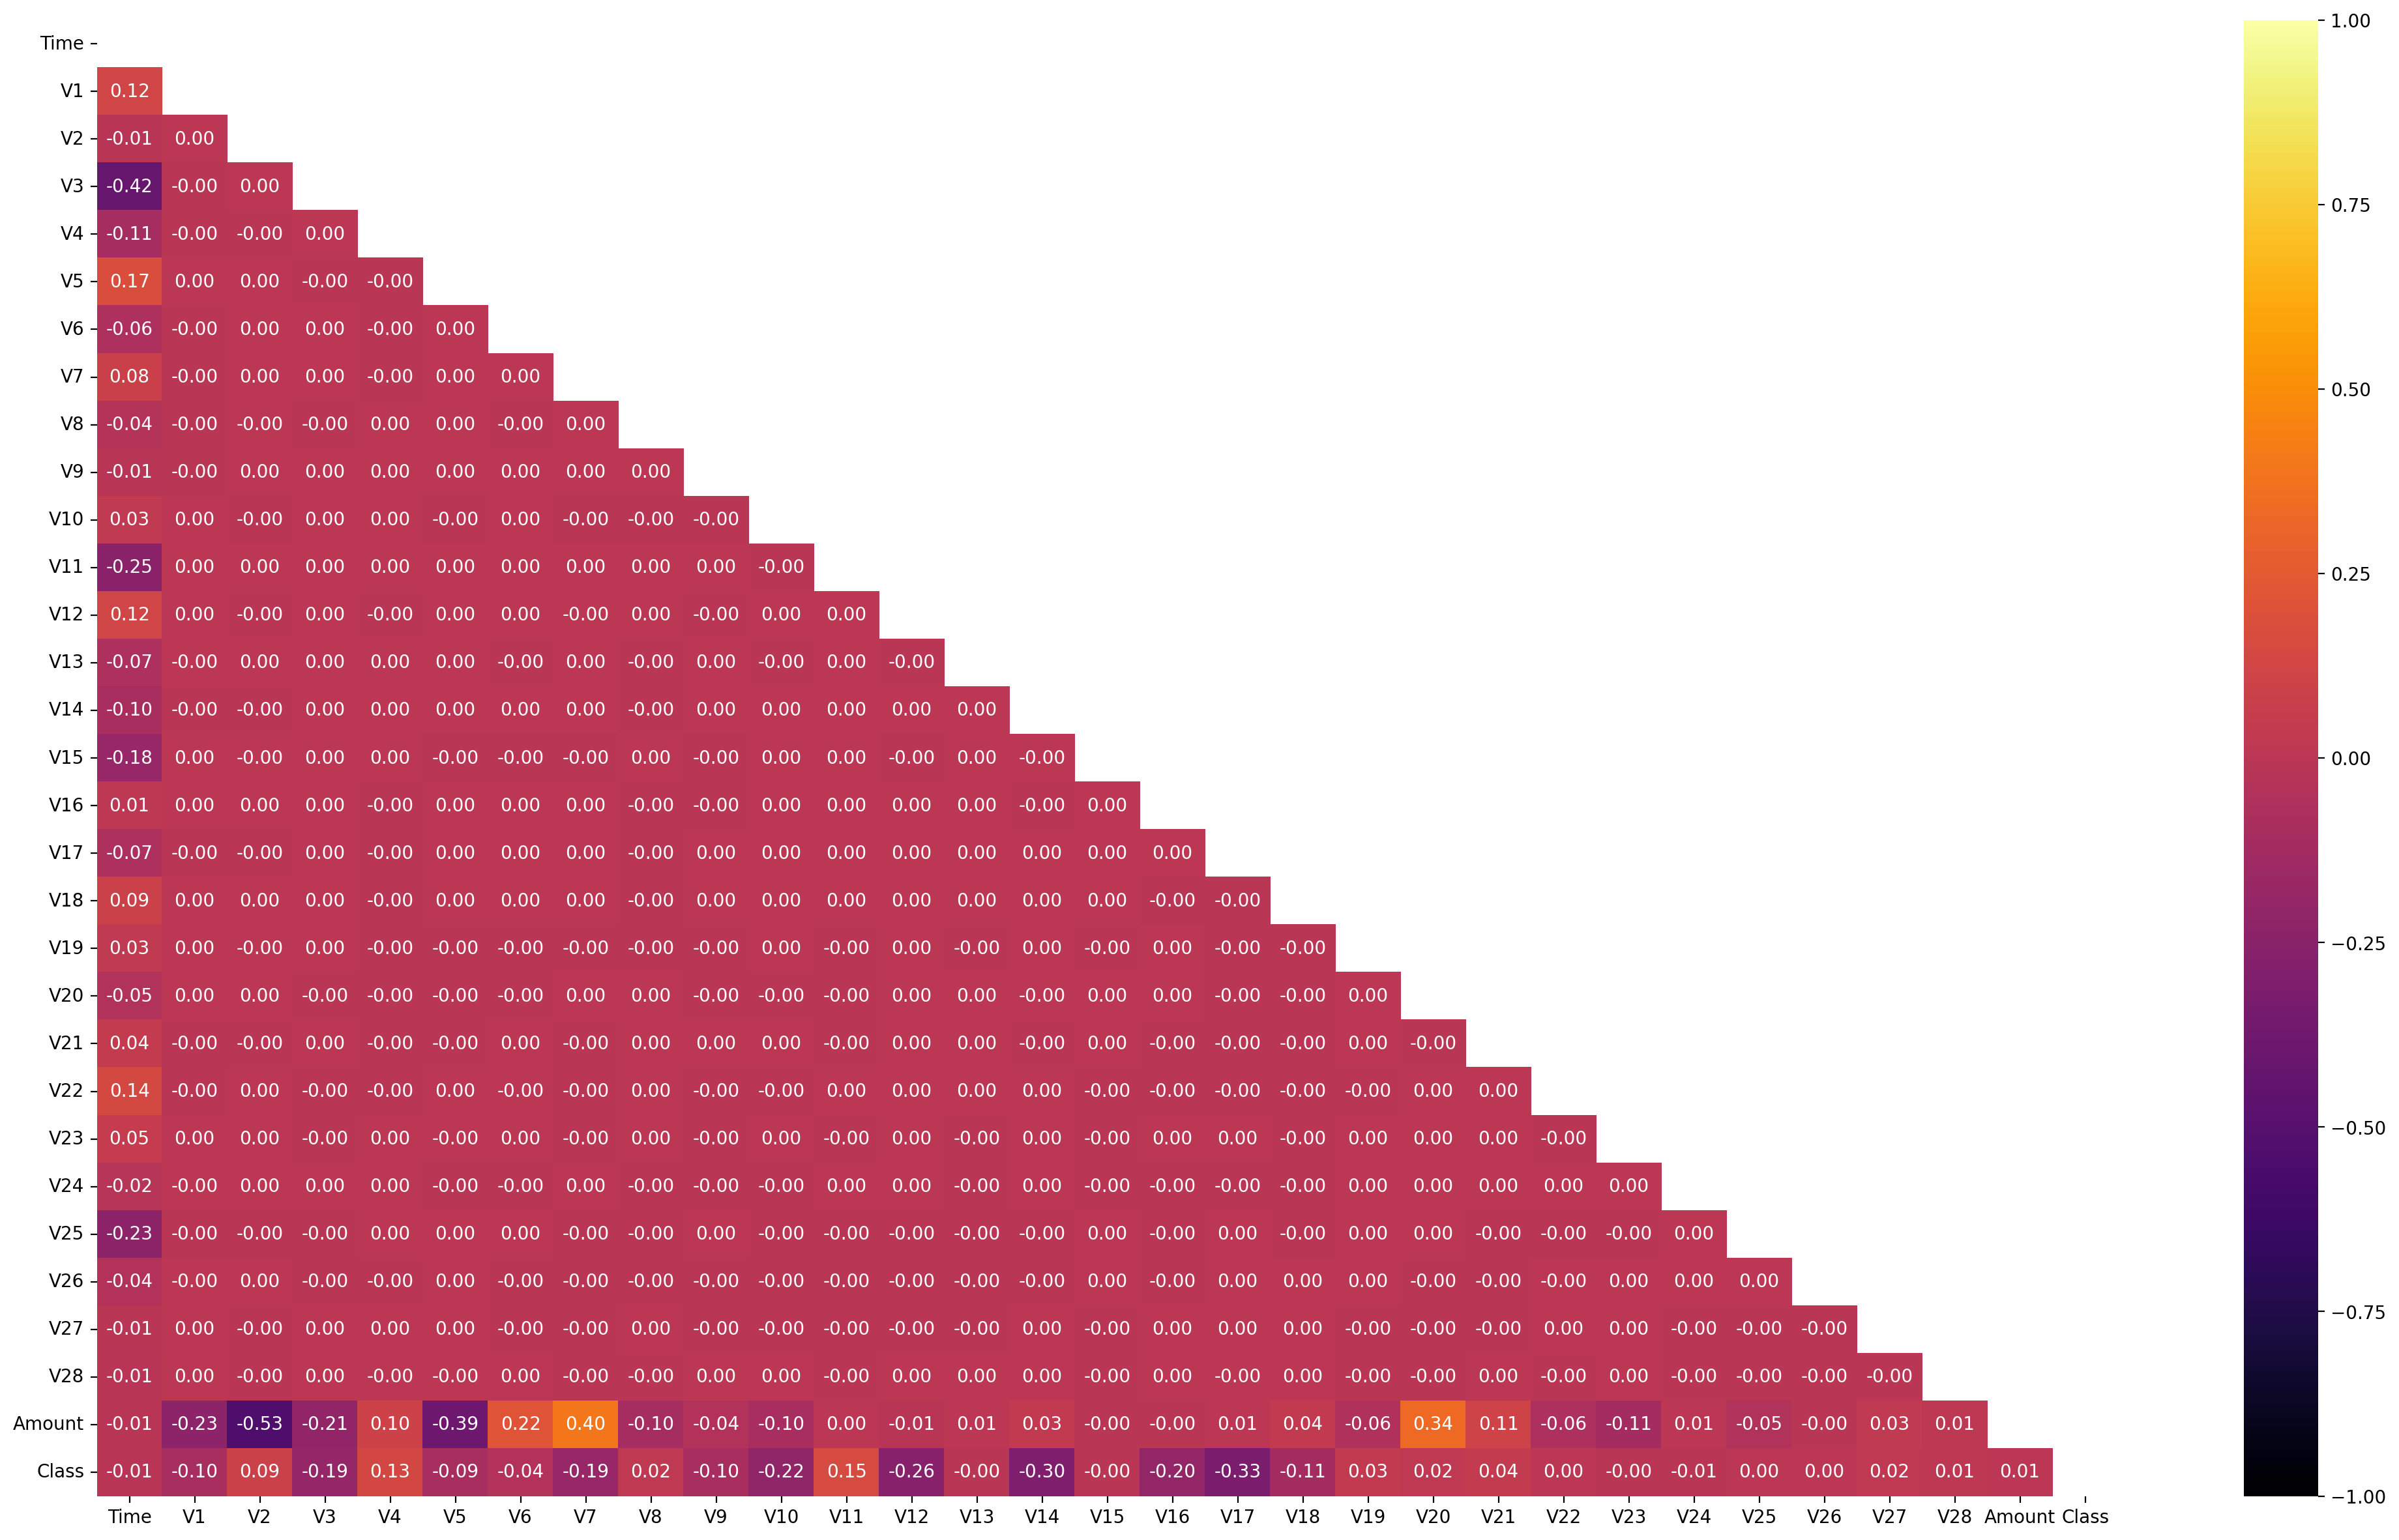

In [ ]:
# Creating a correlation map
mask = np.triu(df.corr())
plt.figure(figsize=(25, 15), dpi=200)
sns.heatmap(df.corr(),
           vmin=-1,
           vmax=1,
           cmap='inferno',
           annot=True,
           fmt='.2f',
           mask=mask)
plt.show(block=False)

Here we will observe the distribution of our classes

In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

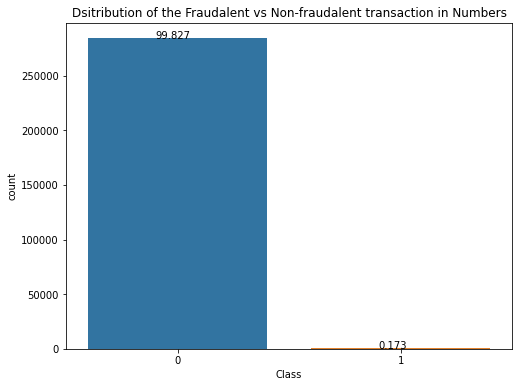

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(8, 6))
ax = sns.countplot(df.Class)
ax.set_title('Dsitribution of the Fraudalent vs Non-fraudalent transaction in Numbers')
for p in ax.patches:
        ax.annotate('{}'.format(round((p.get_height()/len(df.Class))*100, 3)), (p.get_x()+0.3, p.get_height()+100))
plt.show()

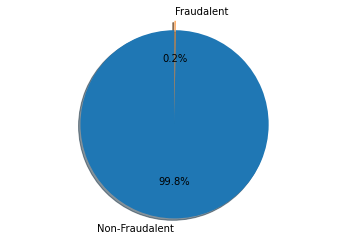

In [ ]:
#Dsitribution of the Fraudalent vs Non-fraudalent transaction in Percentages
labels = 'Non-Fraudalent', 'Fraudalent'
sizes = [normal_share, fraud_share]
explode = (0, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [ ]:
# As time is given in relative fashion, we will need to use pandas.
# Timedelta which Represents a duration, the difference between two dates or times.


Delta_Time = pd.to_timedelta(df['Time'], unit='s')
#Create derived columns Mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

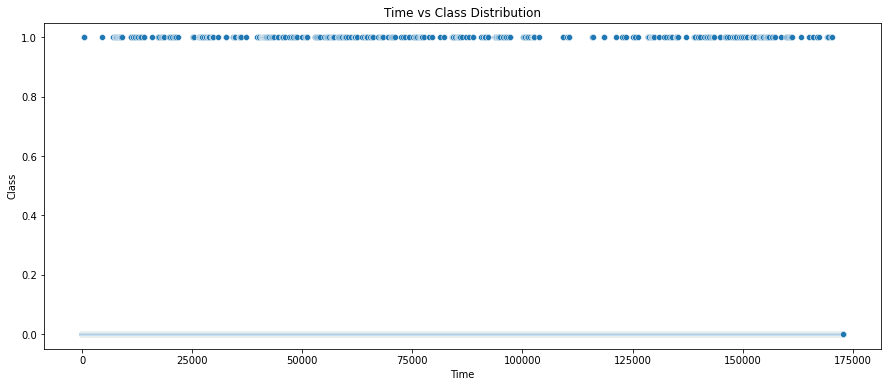

In [ ]:
# Create a scatter plot to observe the distribution of classes with time

plt.figure(figsize=(15,6))
sns.scatterplot(x=df['Time'], y=df['Class'])
plt.title("Time vs Class Distribution")
plt.show()

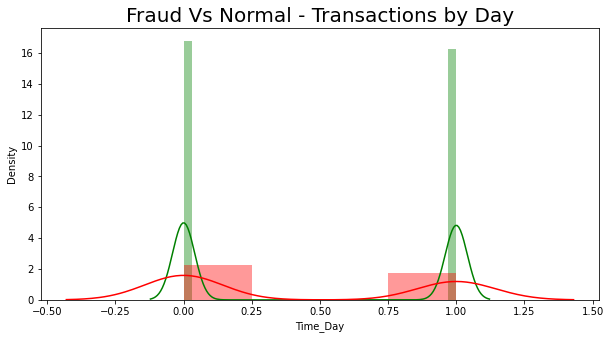

In [ ]:
#The fraus Vs normal trasaction by day
plt.figure(figsize=(10,5))
sns.distplot(df[df['Class'] == 0]["Time_Day"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Day"], color='red')
plt.title('Fraud Vs Normal - Transactions by Day', fontsize=20)
plt.show()

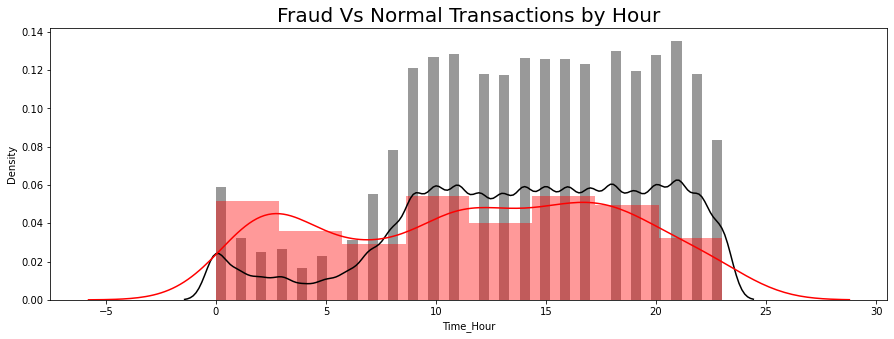

In [ ]:
#The fraud Vs normal trasaction by hour
plt.figure(figsize=(15,5))
sns.distplot(df[df['Class'] == 0]["Time_Hour"], color='black')
sns.distplot(df[df['Class'] == 1]["Time_Hour"], color='red')
plt.title('Fraud Vs Normal Transactions by Hour', fontsize=20)
plt.show()

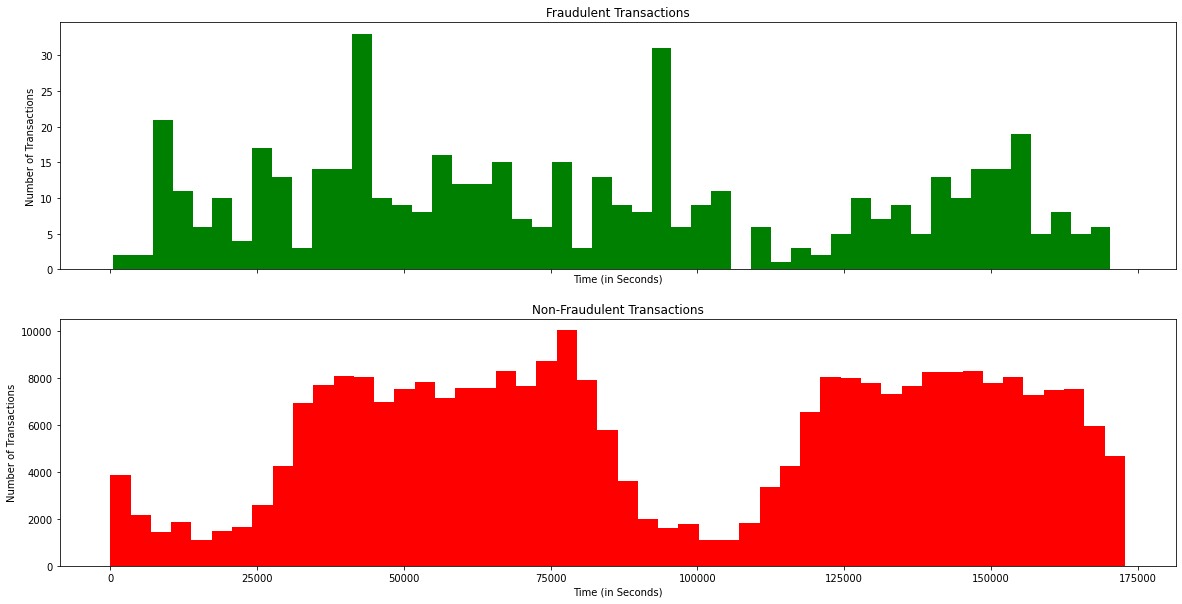

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, figsize=(20,10))

ax1.hist(df.Time[df.Class == 1], bins = 50,color= 'green')
ax1.set_title('Fraudulent Transactions')
ax1.set_xlabel('Time (in Seconds)')
ax1.set_ylabel('Number of Transactions')

ax2.hist(df.Time[df.Class == 0], bins = 50, color= 'red')
ax2.set_title('Non-Fraudulent Transactions')
ax2.set_xlabel('Time (in Seconds)')
ax2.set_ylabel('Number of Transactions')
plt.show()

From the above plots it is clear that non-fradulent transactions take place at higher rate at almost every time as compared to fraudulent transactions.

In [ ]:
df_Fraud = df[df['Class'] == 1]
df_Regular = df[df['Class'] == 0]

# Fraud Transaction Amount Statistics
print(df_Fraud["Amount"].describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [ ]:
#Regular Transaction Amount Statistics
print(df_Regular["Amount"].describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


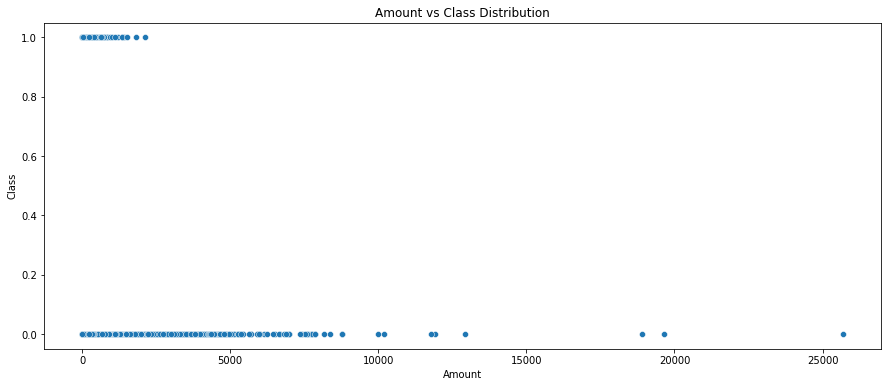

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['Amount'], y=df['Class'])
plt.title("Amount vs Class Distribution")
plt.show()

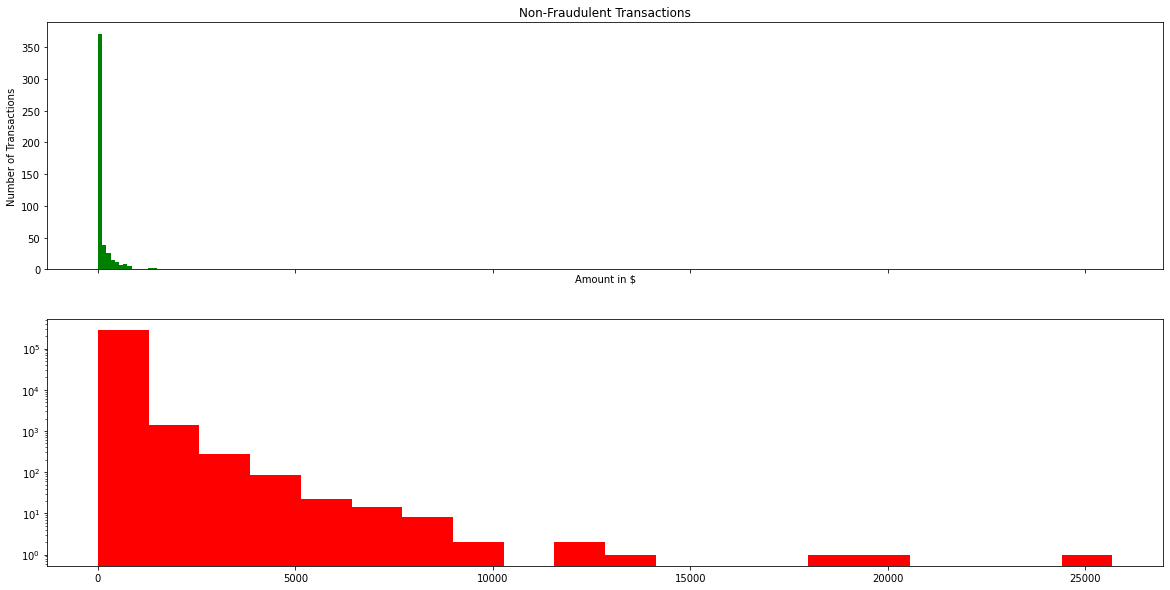

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, figsize=(20,10))

ax1.hist(df.Amount[df.Class == 1], bins = 20,color= 'green')
ax1.set_title('Fraudulent')
ax1.set_title('Fraudulent Transactions')
ax1.set_xlabel('Amount in $')
ax1.set_ylabel('Number of Transactions')

ax2.hist(df.Amount[df.Class == 0], bins = 20,color= 'red')
ax1.set_title('Non-Fraudulent Transactions')
ax1.set_xlabel('Amount in $')
ax1.set_ylabel('Number of Transactions')
plt.yscale('log') #distribution is spreaded for clear analysis
plt.show()

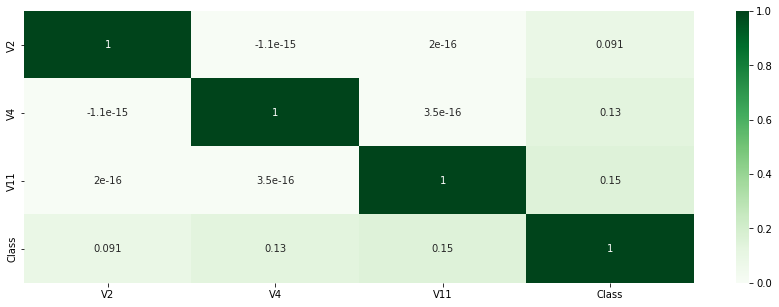

In [ ]:
# Lets plot the heatmap again for relatively strong correlation (i.e. >0.09) with the target variable:
cor = df.corr()
top_feature = cor.index[abs(cor['Class']>0.09)]
plt.subplots(figsize=(15, 5))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True, cmap = 'Greens')
plt.show()

In [ ]:
# Drop unnecessary columns
# As we have derived the Day/Hour/Minutes from the time column we will drop Time
df.drop('Time', axis = 1, inplace= True)
#also day/minutes might not be very useful as this is not time series data, we will keep only derived column hour for more specific
#information
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

### Splitting the data into train & test data

# We are performing stratified train-test split successfully to create train and test data sets.

In [ ]:
y= df['Class']
X = df.drop(['Class'], axis=1)

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [ ]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


### Plotting the distribution of a variable

In [ ]:
cols = list(X.columns.values)
cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Time_Hour']

# We are checking if there is any skewness in the data and has tried to mitigate it.

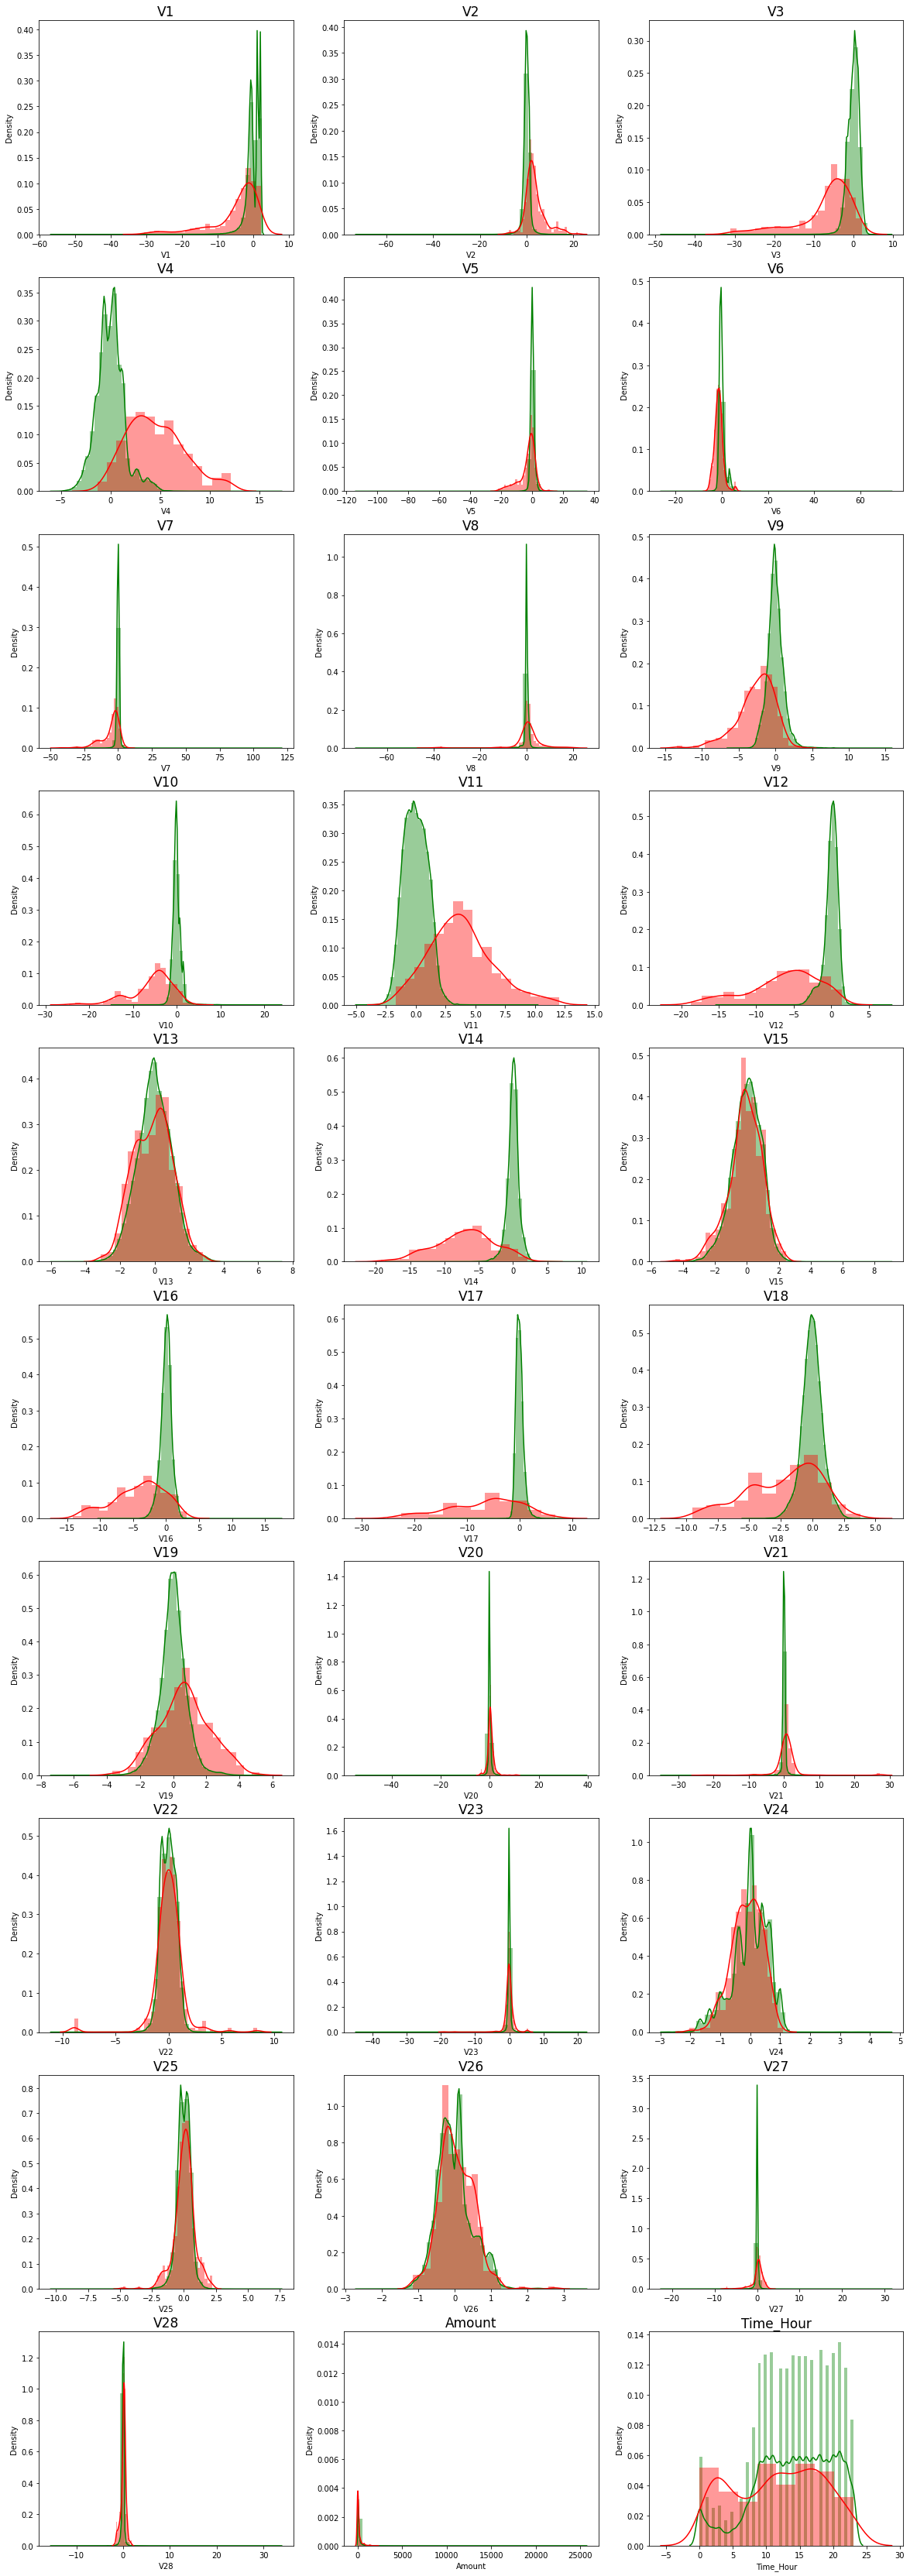

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [ ]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures

pt = PowerTransformer()

# We will fit the PowerTransformer on training data
pt.fit(X_train)

# Then apply on all data
X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

In [ ]:
# Creating a Dataframe
X_train_pt_df = pd.DataFrame(data=X_train_pt, columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt, columns=cols)

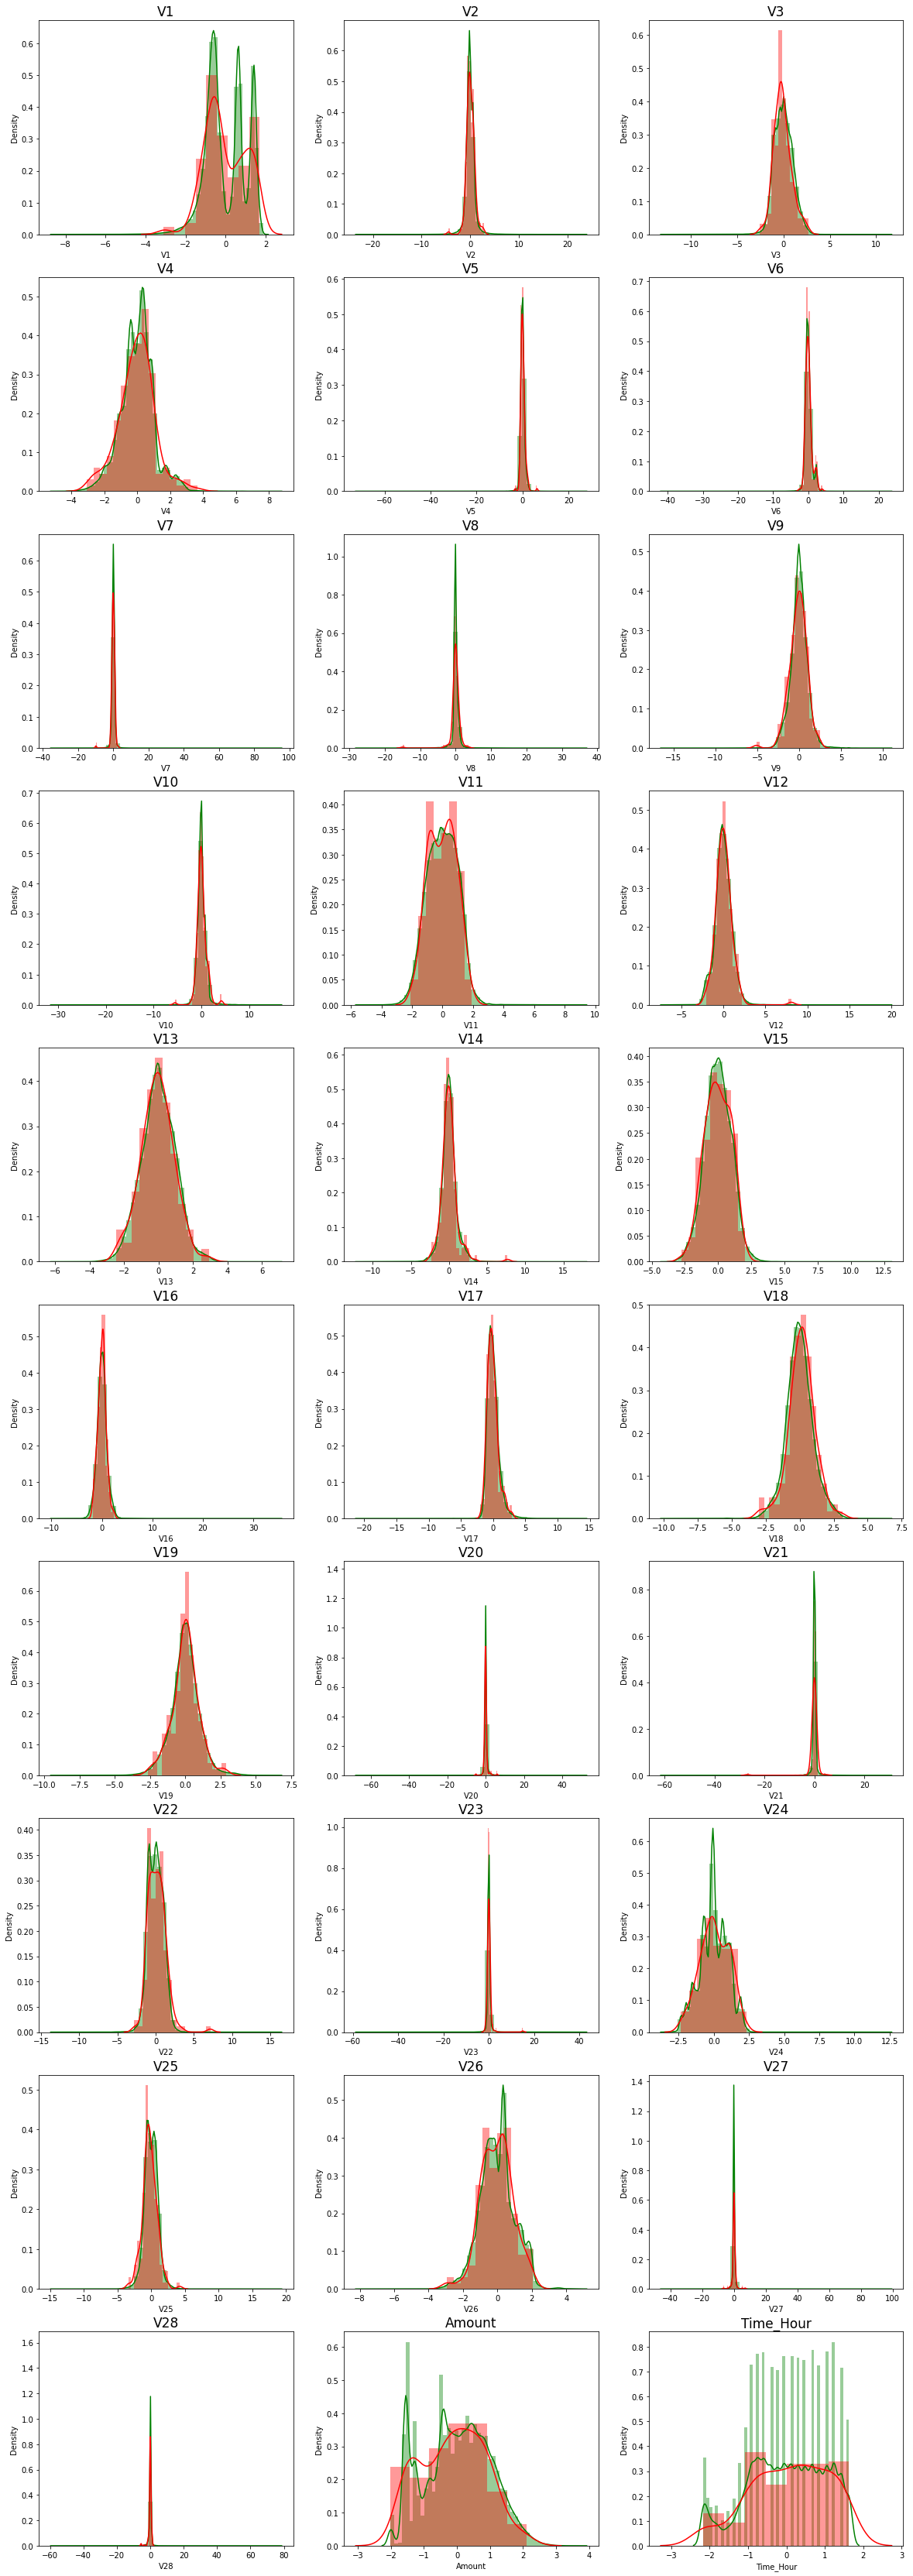

In [ ]:
# plot the histogram of a variable from the dataset again to see the result 
plt.figure(figsize=(20,60))

for n, col in enumerate(cols):
    plt.subplot(10, 3, n+1)
    sns.distplot(X_train_pt_df[col][normal_records], color='green')
    sns.distplot(X_test_pt_df[col][fraud_records], color='red')
    plt.title(col, fontsize=17)
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

# Now performing the required cross-validation and has built different models on raw data (imbalanced data).

In [ ]:
# Creating a DataFrame to store results of all the models
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handling', 'Model', 'Accuracy', 'ROC_Value', 'Threshold'])

In [ ]:
# Creating a function to plot confusion matrix 
from sklearn.metrics import confusion_matrix

def Plot_confusion_matrix(y_test, pred_test):
    cm = confusion_matrix(y_test, pred_test)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
    classNames = ['Non-Fraudulent', 'Fraudulent']
    plt.title("Confusion Matrix for Test Data")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(s[i][j]) + " = " + str(cm[i][j]), fontsize=12)
    plt.show()

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, roc_auc_score

def LogisticRegression_Models(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    num_C = list(np.power(10.0, np.arange(-10, 10)))  #--> list of values
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)   #--> list of values

    searchCV_l2 = linear_model.LogisticRegressionCV(
        Cs=num_C,
        penalty='l2',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='newton-cg',
        tol=10
    )

    searchCV_l1 = linear_model.LogisticRegressionCV(
        Cs=num_C,
        penalty='l1',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='liblinear',
        tol=10
    )

    searchCV_l2.fit(X_train, y_train)
    searchCV_l1.fit(X_train, y_train)

    print("Max AUC_ROC for 12:", searchCV_l2.scores_[1].mean(axis=0).max())
    print("Max AUC_ROC for 11:", searchCV_l1.scores_[1].mean(axis=0).max())

    # calculating predicted values
    y_pred_l2 = searchCV_l2.predict(X_test)
    y_pred_l1 = searchCV_l1.predict(X_test)

    # calculating probabilities of predictions
    y_pred_prob_l2 = searchCV_l2.predict_proba(X_test)[:,1]
    y_pred_prob_l1 = searchCV_l1.predict_proba(X_test)[:,1]

    # Accuracy of l2/l1 models
    accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)
    accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
    
    # L2 Model Accuracy
    print("Accuracy of Logistic Regression model with l2 regularisation : {0}".format(accuracy_l2))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l2)
    print("Classification Report")
    print(classification_report(y_test, y_pred_l2))

    # L1 Model Accuracy
    print("Accuracy of Logistic Regression model with l1 regularisation : {0}".format(accuracy_l1))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l1)
    print("Classification Report")
    print(classification_report(y_test, y_pred_l1))

    
    #print the evaluation result by choosing a evaluation metric for l2 model
    l2_roc_value = roc_auc_score(y_test, y_pred_prob_l2)
    print("l2 roc_value: {0}".format(l2_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_l2)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("l2 threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, AUC="+ str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    # adding the result in the Dataframe
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling': DataImbalance, 'Model': 'Logistic Regression with L2 regularisation',
                                                'Accuracy': accuracy_l2, 'ROC_Value': l2_roc_value, 'Threshold': threshold}, index=[0]), ignore_index=True)

    
    #print the evaluation result by choosing a evaluation metric for l1 model
    l1_roc_value = roc_auc_score(y_test, y_pred_prob_l1)
    print("l1 roc_value: {0}".format(l1_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_l1)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("l1 threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, AUC="+ str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    # adding the result in the Dataframe
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling': DataImbalance, 'Model': 'Logistic Regression with L1 regularisation',
                                                'Accuracy': accuracy_l1, 'ROC_Value': l1_roc_value, 'Threshold': threshold}, index=[0]), ignore_index=True)



    
    return df_Results

Logistic Regression with L1 and L2 Regularisation
Max AUC_ROC for 12: 0.983760023970567
Max AUC_ROC for 11: 0.985410899045824
Accuracy of Logistic Regression model with l2 regularisation : 0.9989993328885924
Confusion Matrix


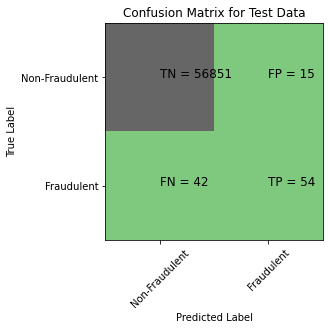

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.78      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy of Logistic Regression model with l1 regularisation : 0.9988413328183702
Confusion Matrix


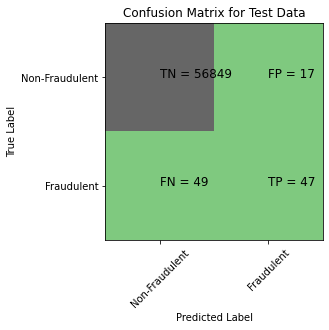

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.73      0.49      0.59        96

    accuracy                           1.00     56962
   macro avg       0.87      0.74      0.79     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9668061026506759
l2 threshold: 0.0012891785768161684
ROC for the test dataset 96.7%


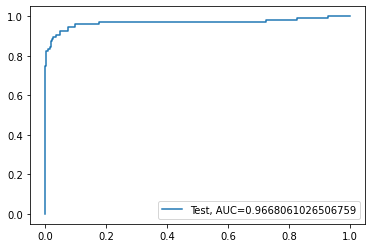

l1 roc_value: 0.9639030791685718
l1 threshold: 0.009276493848975954
ROC for the test dataset 96.4%


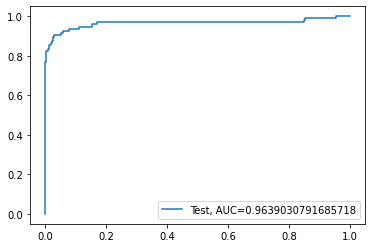

Time taken by the Model: --- 198.8298454284668 seconds ---
********************************************************************************


In [ ]:
#Running the Logistic Regression models
import time
print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_Results = LogisticRegression_Models(df_Results,"Power Transformer", X_train_pt_df, y_train, X_test_pt_df, y_test)
print("Time taken by the Model: --- %s seconds ---" % (time.time() - start_time))
print('*'*80)

In [ ]:
df_Results.head()

,Data_Imbalance_Handling,Model,Accuracy,ROC_Value,Threshold
0,Power Transformer,Logistic Regression with L2 regularisation,0.998999,0.966806,0.001289
1,Power Transformer,Logistic Regression with L1 regularisation,0.998841,0.963903,0.009276


#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

# Now We will perform two types of Cross Validations

1. Repeated KFold
2. Stratified KFold

# After evaluation on the raw data set, the class imbalance has been handled using at least two of the techniques to balance both train and test data sets.

# Repeated KFold Cross Validations




In [ ]:
#perform cross validation using Repeated KFold
#perform hyperparameter tuning
#print the evaluation result by choosing a evaluation metric
#print the optimum value of hyperparameters

from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)

# We know that X is the feature set and y is the target set
for train_index, test_index in rkf.split(X, y):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]


Logistic Regression with L1 and L2 Regularisation
Max AUC_ROC for 12: 0.9818775643908711
Max AUC_ROC for 11: 0.9694742163205146
Accuracy of Logistic Regression model with l2 regularisation : 0.9989817594494479
Confusion Matrix


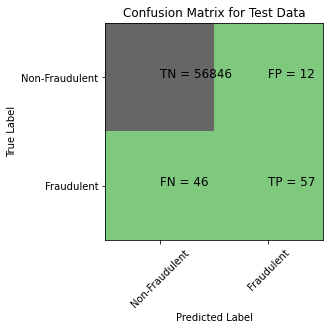

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
           1       0.83      0.55      0.66       103

    accuracy                           1.00     56961
   macro avg       0.91      0.78      0.83     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic Regression model with l1 regularisation : 0.9990344270641316
Confusion Matrix


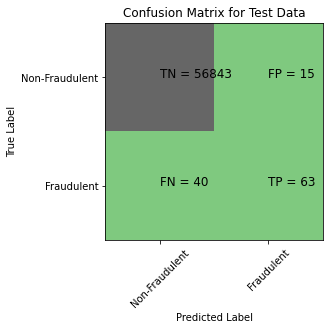

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
           1       0.81      0.61      0.70       103

    accuracy                           1.00     56961
   macro avg       0.90      0.81      0.85     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9905047047883213
l2 threshold: 0.001427881049196275
ROC for the test dataset 99.1%


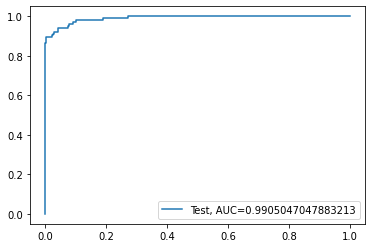

l1 roc_value: 0.9176635576894507
l1 threshold: 0.048156851103151044
ROC for the test dataset 91.8%


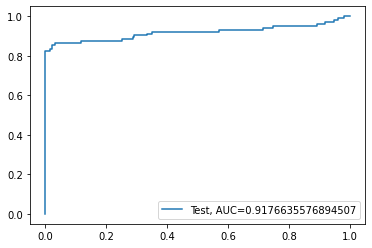

Time taken by the Model: --- 418.6934714317322 seconds ---
********************************************************************************


In [ ]:
# Execute the Logistic Regression model after RepeatedKFold cross validation
print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_Results = LogisticRegression_Models(df_Results,"RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time taken by the Model: --- %s seconds ---" % (time.time() - start_time))
print('*'*80)

In [ ]:
df_Results

,Data_Imbalance_Handling,Model,Accuracy,ROC_Value,Threshold
0,Power Transformer,Logistic Regression with L2 regularisation,0.998999,0.966806,0.001289
1,Power Transformer,Logistic Regression with L1 regularisation,0.998841,0.963903,0.009276
2,RepeatedKFold Cross Validation,Logistic Regression with L2 regularisation,0.998982,0.990505,0.001428
3,RepeatedKFold Cross Validation,Logistic Regression with L1 regularisation,0.999034,0.917664,0.048157


# Stratified KFold Cross Validations

In [ ]:
#perform cross validation using Stratified KFold
#perform hyperparameter tuning
#print the evaluation result by choosing a evaluation metric
#print the optimum value of hyperparameters

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)

# We know that X is the feature set and y is the target set
for train_index, test_index in skf.split(X,y):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

Logistic Regression with L1 and L2 Regularisation
Max AUC_ROC for 12: 0.9823514568991196
Max AUC_ROC for 11: 0.9652106893977332
Accuracy of Logistic Regression model with l2 regularisation : 0.998771088990713
Confusion Matrix


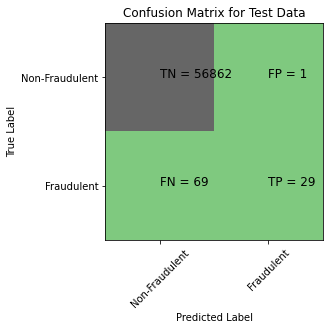

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.73     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic Regression model with l1 regularisation : 0.9987535331191517
Confusion Matrix


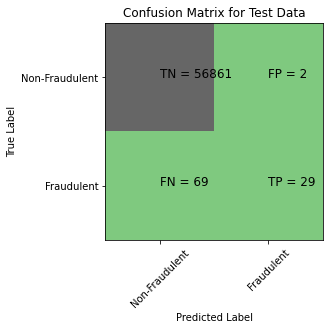

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.97      0.65      0.72     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9833628050520281
l2 threshold: 0.0015593313421020899
ROC for the test dataset 98.3%


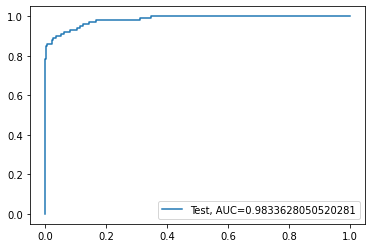

l1 roc_value: 0.8890758561483437
l1 threshold: 0.021087492766199863
ROC for the test dataset 88.9%


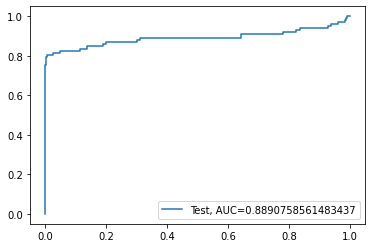

Time taken by the Model: --- 444.2718608379364 seconds ---
********************************************************************************


In [ ]:
# Execute the Logistic Regression model after Stratified KFold cross validation
print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_Results = LogisticRegression_Models(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time taken by the Model: --- %s seconds ---" % (time.time() - start_time))
print('*'*80)

In [ ]:
df_Results

,Data_Imbalance_Handling,Model,Accuracy,ROC_Value,Threshold
0,Power Transformer,Logistic Regression with L2 regularisation,0.998999,0.966806,0.001289
1,Power Transformer,Logistic Regression with L1 regularisation,0.998841,0.963903,0.009276
2,RepeatedKFold Cross Validation,Logistic Regression with L2 regularisation,0.998982,0.990505,0.001428
3,RepeatedKFold Cross Validation,Logistic Regression with L1 regularisation,0.999034,0.917664,0.048157
4,StratifiedKFold Cross Validation,Logistic Regression with L2 regularisation,0.998771,0.983363,0.001559
5,StratifiedKFold Cross Validation,Logistic Regression with L1 regularisation,0.998754,0.889076,0.021087


### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

# KNN

In [ ]:
# importing required functions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

# Creating a function for KNN
def KNN_Models(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=5, n_jobs=16)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print("Model Score")
    print(score)
    
    # Accuracy
    y_pred = knn.predict(X_test)
    KNN_accuracy = metrics.accuracy_score(y_pred = y_pred, y_true = y_test)
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred)
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    
    knn_prob = knn.predict_proba(X_test)[:, 1]
    
    #Calculating roc_auc value
    knn_roc_val = roc_auc_score(y_test, knn_prob)
    print("KNN roc_value: {0}" .format(knn_roc_val))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_prob)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("KNN threshold: {0}" .format(threshold))
    
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the Test Dataset", "{:.1%}".format(roc_auc))
    plt.plot(fpr, tpr, label="Test, AUC = "+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling': DataImbalance, 'Model': 'KNN', 'Accuracy': score,
                                            'ROC_Value': knn_roc_val, 'Threshold': threshold}, index=[0]), ignore_index=True)
    
    return df_Results

# SVM

In [ ]:
# importing required SVM libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# creating a function for SVM model
def SVM_Model(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    clf = SVC(kernel='sigmoid', random_state=42)
    clf.fit(X_train, y_train)
    y_pred_SVM = clf.predict(X_test)
    SVM_score = accuracy_score(y_test, y_pred_SVM)
    print("accuracy_score : {0}".format(SVM_score))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_SVM)
    print("Classification Report")
    print(classification_report(y_test, y_pred_SVM))
    
    #Running classifier
    classifier = SVC(kernel='sigmoid', probability=True)
    svm_prob = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    
    # Calculation ROC_AUC value
    roc_value = roc_auc_score(y_test, svm_prob)
    
    print("SVM roc_value: {0}".format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_prob)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("SVM threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the Test Dataset", "{:,.1%}".format(roc_auc))
    plt.plot(fpr, tpr, label="Test, AUC= "+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling': DataImbalance, 'Model': 'SVM', 'Accuracy':SVM_score, 
                                                 'ROC_Value': roc_value, 'Threshold': threshold}, index=[0]), ignore_index=True)
    
    return df_Results

# Decision Tree

In [ ]:
# importing required DecisionTree libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# creating a function for DecisionTree model
def DecisionTree_Model(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    # declairing important variables and its values 
    criteria = ['gini', 'entropy']
    scores = {}
    
    for c in criteria:
        dt = DecisionTreeClassifier(criterion= c, random_state=42)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        test_score = dt.score(X_test, y_test)
        tree_pred = dt.predict_proba(X_test)[:, 1]
        tree_roc_value = roc_auc_score(y_test, tree_pred)
        scores = test_score
        print(c + "score: {0}".format(test_score))
        print("Confusion Matrix")
        Plot_confusion_matrix(y_test, y_pred)
        print("Classification Report")
        print(classification_report(y_test, y_pred))
        print(c + "tree_roc_value: {0}".format(tree_roc_value))
        fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_pred)
        threshold = thresholds[np.argmax(tpr-fpr)]
        print("Tree thresholds: {0}".format(threshold))
        roc_auc = metrics.auc(fpr, tpr)
        print("ROC for the Test Dataset", '{:.1%}'.format(roc_auc))
        plt.plot(fpr, tpr, label="Test, AUC= "+str(roc_auc))
        plt.legend(loc=4)
        plt.show()
        
        df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling':DataImbalance, 'Model':'Tree Model with {0} criteria'.format(c),
                                                    'Accuracy':test_score, 'ROC_Value':tree_roc_value, 'Threshold':threshold}, index=[0]),
                                                     ignore_index=True)
        
        return df_Results

# Random Forest

In [ ]:
# importing required Random Forest libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# creating a function for Random Forest model

def RandomForest_Model(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    
    #Model with 100 trees
    RF_model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features='sqrt', random_state=42)
    
    #Fitting the model on training data
    RF_model.fit(X_train, y_train)
    RF_test_score = RF_model.score(X_test, y_test)
    RF_model.predict(X_test)
    print("Model Accuracy: {0}".format(RF_test_score))
    
    # Predictions
    rf_predictions = RF_model.predict(X_test)
    
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, rf_predictions)
    print("Classification Report")
    print(classification_report(y_test, rf_predictions))
    
    # Class probabilities
    rf_prob = RF_model.predict_proba(X_test)[:, 1]
    
    #Calculation ROC_AUC
    roc_value = roc_auc_score(y_test, rf_prob)
    
    print("Random Forest roc_value: {0}".format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_prob)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Random Forest threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the Test Dataset", "{:.1%}".format(roc_auc))
    plt.plot(fpr, tpr, label="Test, AUC= "+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling': DataImbalance, 'Model': 'Random Forest', 
                                                'Accuracy':RF_test_score, 'ROC_Value': roc_value, 'Threshold': threshold},
                                                index=[0]), ignore_index=True)
    
    return df_Results

# XGBoost

In [ ]:
# importing xgboost libraries and metrics from sklearn
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# creating a function for XGBoost model
def XGBoost_Model(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    XGBModel = XGBClassifier(random_state=42)
    
    #fitting the model on training data
    XGBModel.fit(X_train, y_train)
    
    y_pred = XGBModel.predict(X_test)
    
    XGB_test_score = XGBModel.score(X_test, y_test)
    print("Model Accuracy: {0}".format(XGB_test_score))
    
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred)
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    
    #calculating probabilites of each class
    XGB_prob = XGBModel.predict_proba(X_test)[:, 1]
    
    #Calculating ROC AUc
    XGB_roc_value = roc_auc_score(y_test, XGB_prob)
    
    print ("XGBoost roc_value: {0}".format(XGB_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_prob)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("XGBoost threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the Test Dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, AUC= "+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling': DataImbalance, 'Model': "XGBoost", 
                                                 'Accuracy': XGB_test_score, 'ROC_Value': XGB_roc_value, 'Threshold': threshold},
                                               index=[0]), ignore_index=True)
    
    return df_Results

# Now Execute all the models with Power Transformer , Repeated KFOld and Stratified KFOld

KNN Model
Model Score
0.9992977774656788
Confusion Matrix


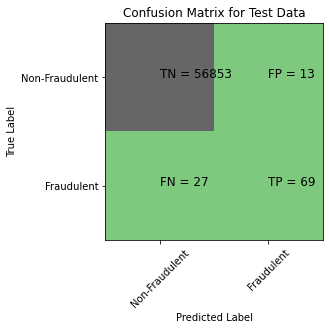

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.84      0.72      0.78        96

    accuracy                           1.00     56962
   macro avg       0.92      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962

KNN roc_value: 0.900851068740548
KNN threshold: 0.2
ROC for the Test Dataset 90.1%


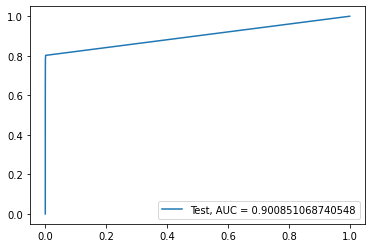

Time Taken by Model: --- 1618.9656386375427 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
giniscore: 0.9988062216916541
Confusion Matrix


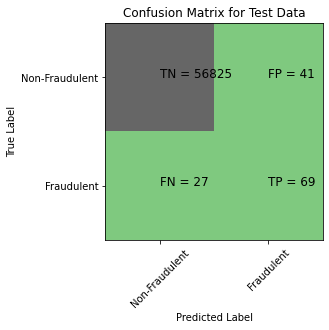

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.63      0.72      0.67        96

    accuracy                           1.00     56962
   macro avg       0.81      0.86      0.83     56962
weighted avg       1.00      1.00      1.00     56962

ginitree_roc_value: 0.8590145033939437
Tree thresholds: 1.0
ROC for the Test Dataset 85.9%


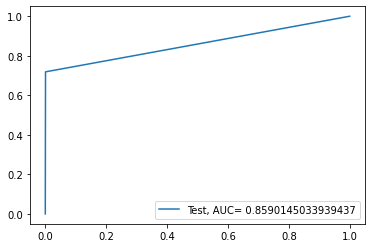

Time Taken by Model: --- 24.243128061294556 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9993504441557529
Confusion Matrix


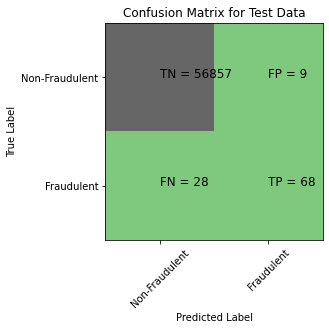

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.88      0.71      0.79        96

    accuracy                           1.00     56962
   macro avg       0.94      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest roc_value: 0.940564037972309
Random Forest threshold: 0.01
ROC for the Test Dataset 94.1%


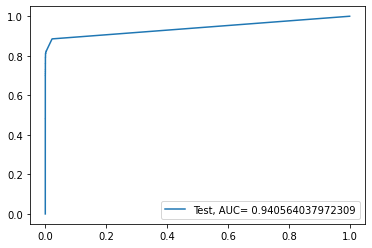

Time Taken by Model: --- 280.1198251247406 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9993153330290369
Confusion Matrix


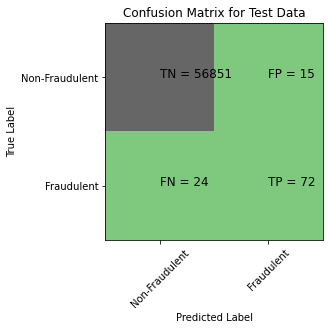

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.83      0.75      0.79        96

    accuracy                           1.00     56962
   macro avg       0.91      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962

XGBoost roc_value: 0.9750367091056167
XGBoost threshold: 0.0007558927754871547
ROC for the Test Dataset 97.5%


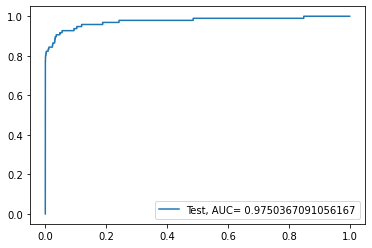

Time Taken by Model: --- 65.73683333396912 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9985604438046417
Confusion Matrix


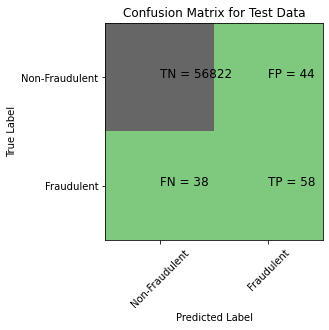

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.57      0.60      0.59        96

    accuracy                           1.00     56962
   macro avg       0.78      0.80      0.79     56962
weighted avg       1.00      1.00      1.00     56962

SVM roc_value: 0.8913401314786809
SVM threshold: 0.001308614651983585
ROC for the Test Dataset 89.1%


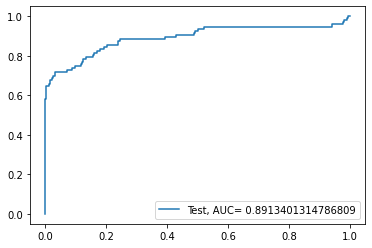

Time Taken by Model: --- 127.24264979362488 seconds ---


In [ ]:
# Power Transformer

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = KNN_Models(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = DecisionTree_Model(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = RandomForest_Model(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = XGBoost_Model(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = SVM_Model(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

KNN Model
Model Score
0.9992099857797441
Confusion Matrix


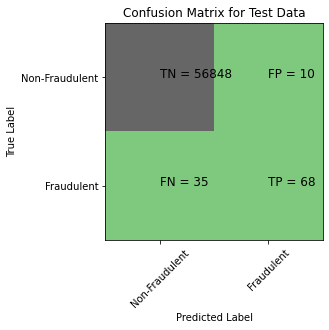

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
           1       0.87      0.66      0.75       103

    accuracy                           1.00     56961
   macro avg       0.94      0.83      0.88     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.897875630893792
KNN threshold: 0.2
ROC for the Test Dataset 89.8%


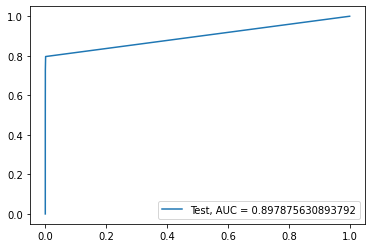

Time Taken by Model: --- 1593.1554844379425 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
giniscore: 0.9992450975228665
Confusion Matrix


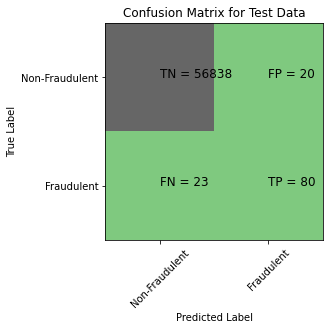

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
           1       0.80      0.78      0.79       103

    accuracy                           1.00     56961
   macro avg       0.90      0.89      0.89     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value: 0.8881736378175302
Tree thresholds: 1.0
ROC for the Test Dataset 88.8%


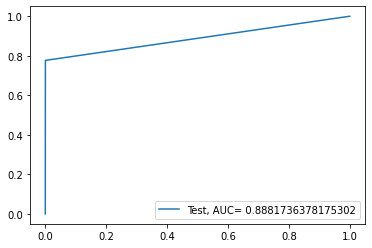

Time Taken by Model: --- 26.004371404647827 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9996488825687752
Confusion Matrix


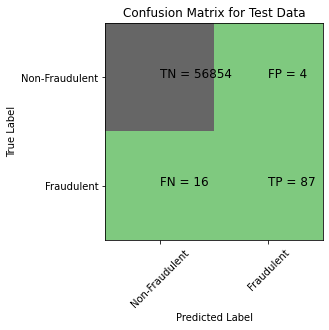

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
           1       0.96      0.84      0.90       103

    accuracy                           1.00     56961
   macro avg       0.98      0.92      0.95     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9500292331056726
Random Forest threshold: 0.02
ROC for the Test Dataset 95.0%


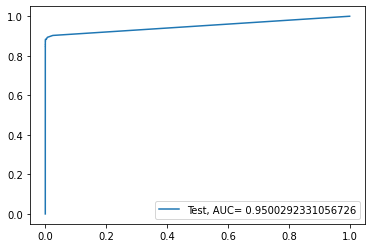

Time Taken by Model: --- 287.1413118839264 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9996137708256526
Confusion Matrix


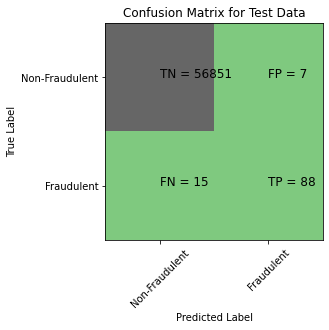

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
           1       0.93      0.85      0.89       103

    accuracy                           1.00     56961
   macro avg       0.96      0.93      0.94     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9845141379290325
XGBoost threshold: 0.0018164071952924132
ROC for the Test Dataset 98.5%


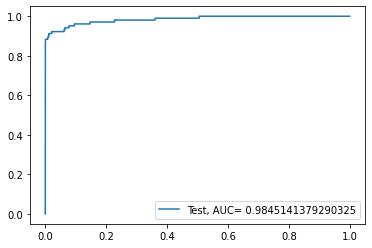

Time Taken by Model: --- 64.0640332698822 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9981566334860694
Confusion Matrix


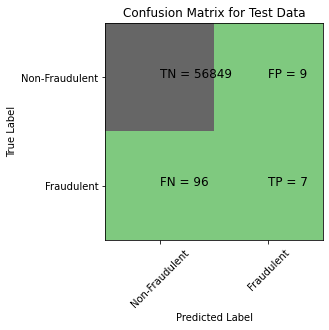

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
           1       0.44      0.07      0.12       103

    accuracy                           1.00     56961
   macro avg       0.72      0.53      0.56     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.508815010789953
SVM threshold: 0.004360493920785283
ROC for the Test Dataset 50.9%


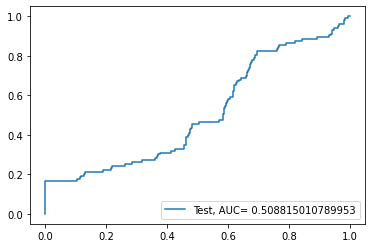

Time Taken by Model: --- 225.4861080646515 seconds ---


In [ ]:
#Repeated KFold

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = KNN_Models(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = DecisionTree_Model(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = RandomForest_Model(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = XGBoost_Model(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = SVM_Model(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

KNN Model
Model Score
0.9991924299081828
Confusion Matrix


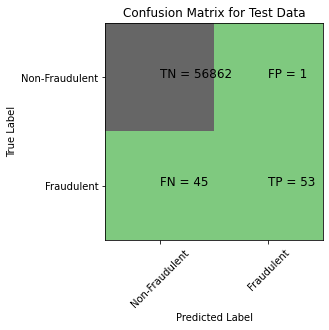

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.54      0.70        98

    accuracy                           1.00     56961
   macro avg       0.99      0.77      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8057457828285457
KNN threshold: 0.2
ROC for the Test Dataset 80.6%


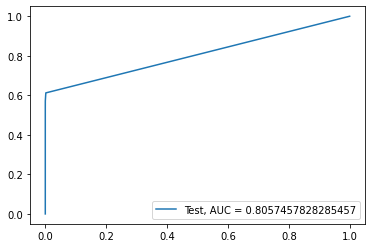

Time Taken by Model: --- 2059.4042336940765 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
giniscore: 0.998841312476958
Confusion Matrix


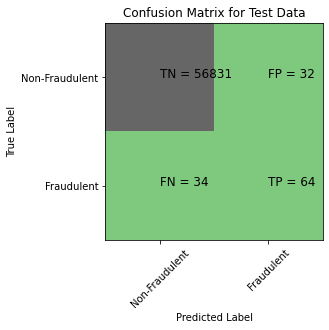

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.83      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value: 0.8262492341959029
Tree thresholds: 1.0
ROC for the Test Dataset 82.6%


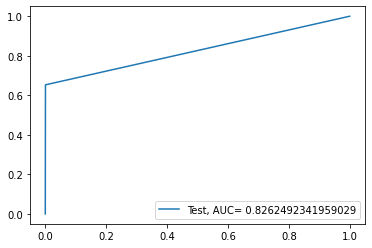

Time Taken by Model: --- 26.026932954788208 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


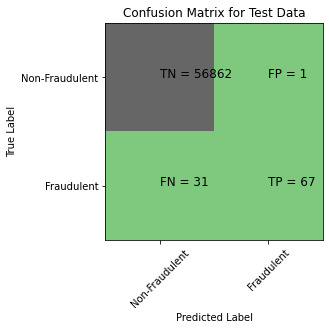

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9464721329855826
Random Forest threshold: 0.01
ROC for the Test Dataset 94.6%


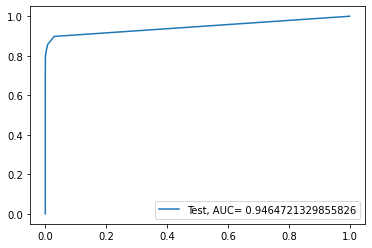

Time Taken by Model: --- 273.52201890945435 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9993855444953564
Confusion Matrix


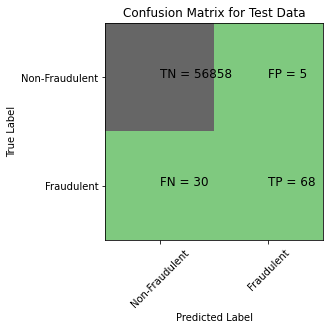

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.69      0.80        98

    accuracy                           1.00     56961
   macro avg       0.97      0.85      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9781480694558744
XGBoost threshold: 0.002443221863359213
ROC for the Test Dataset 97.8%


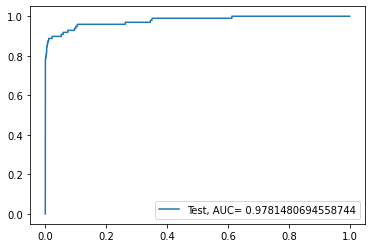

Time Taken by Model: --- 63.23897099494934 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9982795245869981
Confusion Matrix


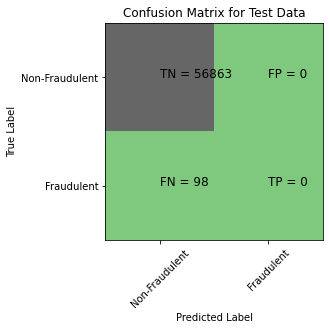

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.40177034885494567
SVM threshold: 0.001972442745811129
ROC for the Test Dataset 40.2%


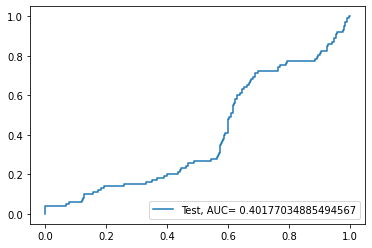

Time Taken by Model: --- 521.8550224304199 seconds ---


In [ ]:
# Stratified KFold
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = KNN_Models(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = DecisionTree_Model(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = RandomForest_Model(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = XGBoost_Model(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = SVM_Model(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
df_Results

,Data_Imbalance_Handling,Model,Accuracy,ROC_Value,Threshold
0,Power Transformer,Logistic Regression with L2 regularisation,0.998999,0.966806,0.001289
1,Power Transformer,Logistic Regression with L1 regularisation,0.998841,0.963903,0.009276
2,RepeatedKFold Cross Validation,Logistic Regression with L2 regularisation,0.998982,0.990505,0.001428
3,RepeatedKFold Cross Validation,Logistic Regression with L1 regularisation,0.999034,0.917664,0.048157
4,StratifiedKFold Cross Validation,Logistic Regression with L2 regularisation,0.998771,0.983363,0.001559
5,StratifiedKFold Cross Validation,Logistic Regression with L1 regularisation,0.998754,0.889076,0.021087
6,Power Transformer,KNN,0.999298,0.900851,0.200000
7,Power Transformer,Tree Model with gini criteria,0.998806,0.859015,1.000000
8,Power Transformer,Random Forest,0.999350,0.940564,0.010000
9,Power Transformer,XGBoost,0.999315,0.975037,0.000756


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

# Model hyperparameters are tuned using correct principles, and the approach is explained clearly.

In [ ]:
 # Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

clf = searchCV_l2  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)

#print the evaluation score on the X_test by choosing the best evaluation metric

print ('Max auc_roc for l2:', clf.scores_[1].mean(axis=0).max())


print("Parameters for l2 regularisations")
print(clf.coef_)
print(clf.intercept_) 
print(clf.scores_) 


#Calculating predicted values
y_pred_l2 = clf.predict(X_test)


#Calculating predicted probabilities
y_pred_probs_l2 = clf.predict_proba(X_test)[:,1] 


# Accuaracy of L2/L1 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)


print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))


from sklearn.metrics import roc_auc_score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}" .format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))

Max auc_roc for l2: 0.9862697181552733
Parameters for l2 regularisations
[[ 2.09691941e-02  3.25593416e-02 -8.94094020e-02  2.36344991e-01
   8.30248773e-02 -4.89159480e-02 -3.27360450e-02 -1.07925750e-01
  -9.18493758e-02 -1.74521080e-01  1.35357694e-01 -2.07715618e-01
  -4.28253966e-02 -3.76974669e-01 -1.07789338e-02 -1.04413884e-01
  -1.14461191e-01 -8.60980693e-03  1.49065483e-02 -5.65100022e-03
   3.93942009e-02  2.42176331e-02  1.93714442e-03 -1.56801464e-02
  -7.86978400e-03  5.16043688e-03 -3.31135281e-03 -2.15188699e-04
   3.02678122e-04  3.89001717e-03]]
[-7.48385133]
{1: array([[0.582166  , 0.58434192, 0.6102234 , 0.77826009, 0.94270322,
        0.98595298, 0.99602302, 0.99466643, 0.99389961, 0.99488012,
        0.99387397, 0.99387397, 0.99387397, 0.99387397, 0.99387397,
        0.99387397, 0.99387397, 0.99387397, 0.99387397, 0.99387397],
       [0.56185378, 0.56172062, 0.57980386, 0.72096766, 0.88968294,
        0.93991214, 0.97546068, 0.97839009, 0.97926012, 0.98075456,
  

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 4
2nd Top var = 11
3rd Top var = 5


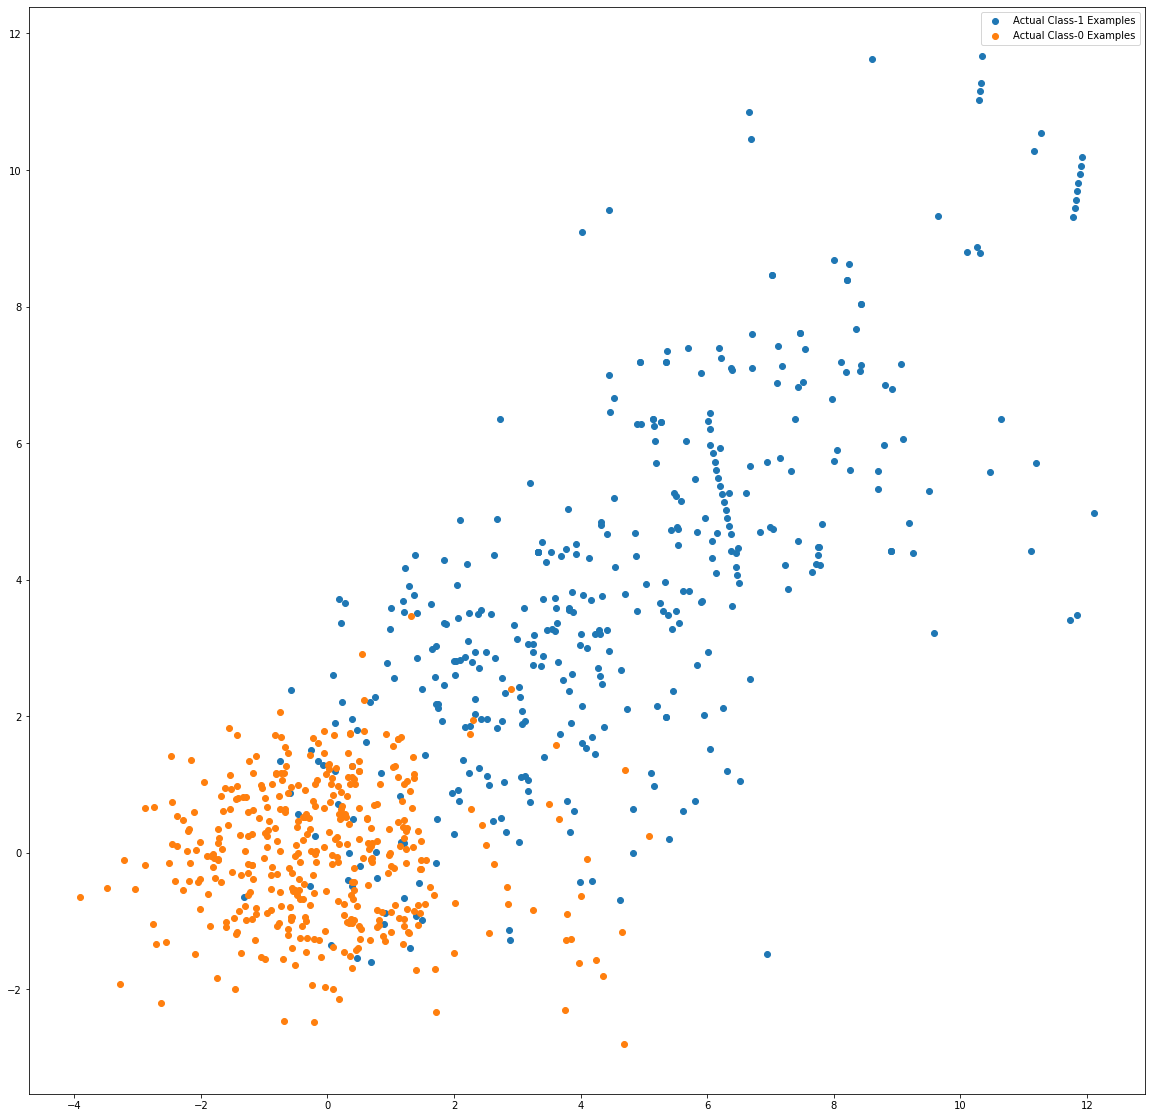

In [ ]:
var_imp = []
for i in clf.coef_[0]:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.coef_[0])[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.coef_[0])[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.coef_[0])[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.coef_[0])[-1])
second_top_var_index = var_imp.index(np.sort(clf.coef_[0])[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
# plt.rcParams['figure.figsize'] = [20, 20]
plt.figure(figsize=[20,20])


plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

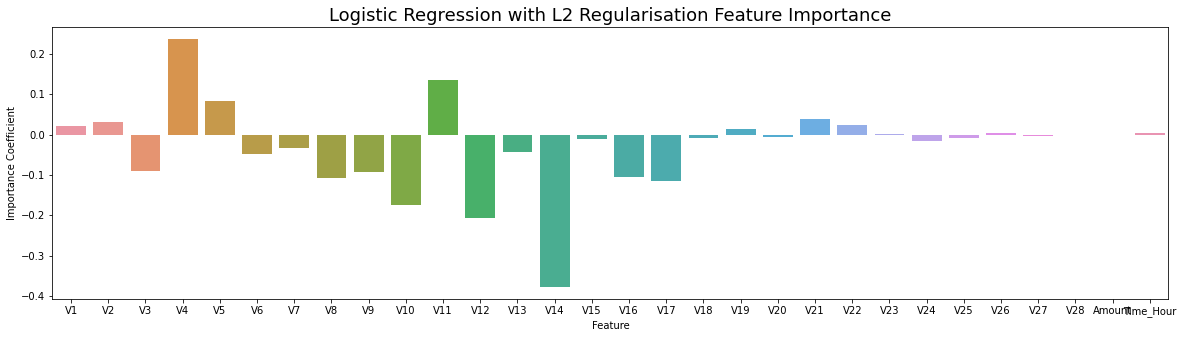

In [ ]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(searchCV_l2.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)

plt.show()

From the above plot it is evident that V4, V11, v5 has a positive imporatnce whereas V14, V12, V10 seems to have negative impact on the predictaions

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

We have already created the functions of all the required models, which just need to be called along with appropriate parameters. Also, from the previous iterations of running the model, it is evident that SVM is requires quite extensive computing and processing power so, we won't be able to run that model further.

## Model Building
- Build different models on the balanced dataset and see the result

# A reasonable number and variety of different models are attempted on balanced classes, and the best one is chosen based on key performance metrics.

In [ ]:
# # Logistic Regression
# from sklearn import linear_model #import the package

# num_C = ______  #--> list of values
# cv_num =   #--> list of values

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
# We will perform StratifiedKFold Cross Validation

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    ROS = RandomOverSampler(sampling_strategy = 0.5)
    X_over, y_over = ROS.fit_resample(X_train, y_train)
    
# Creating a separate dataframe for X_over
X_over = pd.DataFrame(data = X_over, columns=cols)

# As discussed earlier, Due to extensive computational requirements, we won't be running the SVM Model after RandomOverSampling, but we will include the code in the comment


Logistic Regression with L1 and L2 Regularisation
Max AUC_ROC for 12: 0.9860207395550994
Max AUC_ROC for 11: 0.5
Accuracy of Logistic Regression model with l2 regularisation : 0.9864117554115974
Confusion Matrix


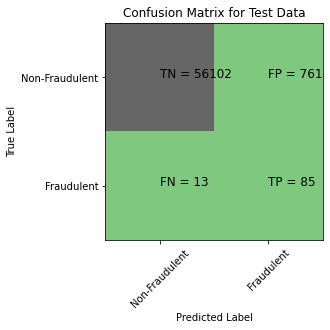

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.10      0.87      0.18        98

    accuracy                           0.99     56961
   macro avg       0.55      0.93      0.59     56961
weighted avg       1.00      0.99      0.99     56961

Accuracy of Logistic Regression model with l1 regularisation : 0.9982795245869981
Confusion Matrix


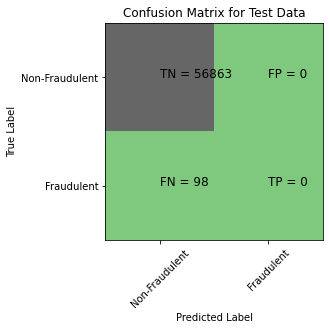

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9807688511628558
l2 threshold: 0.33271655928670496
ROC for the test dataset 98.1%


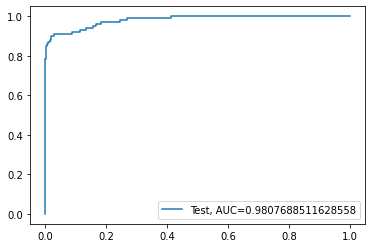

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


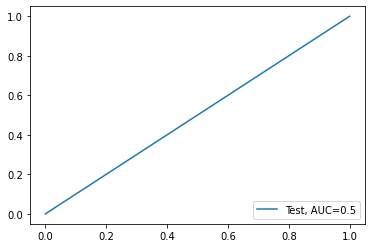

Time taken by the Model: --- 667.8683443069458 seconds ---
********************************************************************************
KNN Model
Model Score
0.9980688541282632
Confusion Matrix


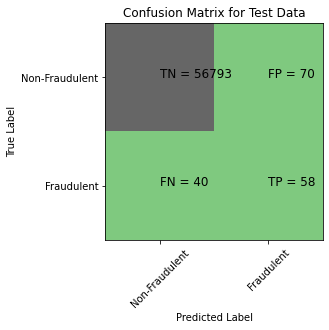

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.45      0.59      0.51        98

    accuracy                           1.00     56961
   macro avg       0.73      0.80      0.76     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.805604465728046
KNN threshold: 0.2
ROC for the Test Dataset 80.6%


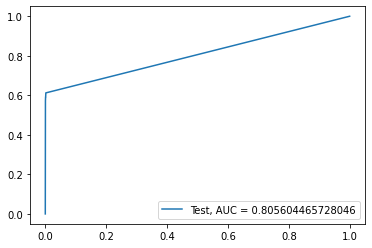

Time Taken by Model: --- 2867.5338940620422 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
giniscore: 0.9989642035778866
Confusion Matrix


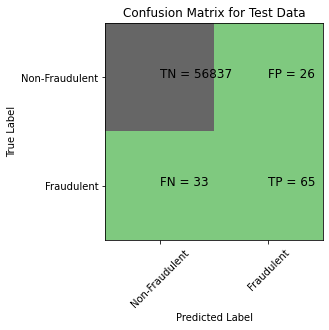

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.71      0.66      0.69        98

    accuracy                           1.00     56961
   macro avg       0.86      0.83      0.84     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value: 0.831404033396416
Tree thresholds: 1.0
ROC for the Test Dataset 83.1%


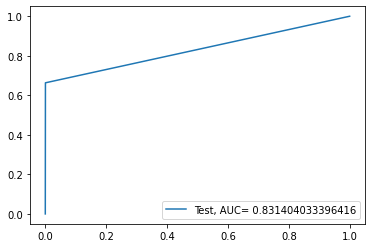

Time Taken by Model: --- 14.383918762207031 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995084355962852
Confusion Matrix


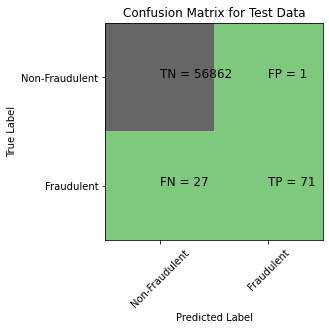

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.72      0.84        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9308762880492929
Random Forest threshold: 0.02
ROC for the Test Dataset 93.1%


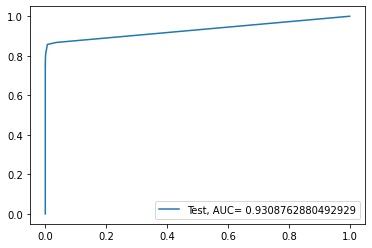

Time Taken by Model: --- 221.9464569091797 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9963132669721388
Confusion Matrix


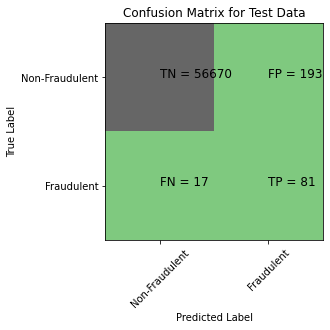

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.30      0.83      0.44        98

    accuracy                           1.00     56961
   macro avg       0.65      0.91      0.72     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9833383100879415
XGBoost threshold: 0.1841813176870346
ROC for the Test Dataset 98.3%


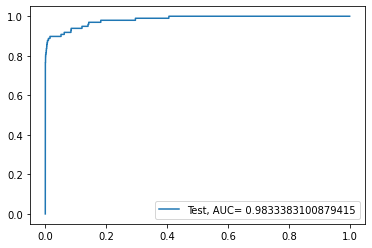

Time Taken by Model: --- 87.70423889160156 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

# Running the SVM Model with Sigmoid Kernel
# print("SVM Model with Sigmoid Kernel")
# start_time = time.time()
# df_Results = SVM_Model(df_Results,"Random Oversampling with StratifiedKFold CV", X_over, y_over, X_test, y_test)
# print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

# Running the Logistic Regression model 
print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_Results = LogisticRegression_Models(df_Results,"Random Oversampling with StratifiedKFold CV", X_over, y_over, X_test, y_test)
print("Time taken by the Model: --- %s seconds ---" % (time.time() - start_time))
print('*'*80)

# Running the KNN Model
print("KNN Model")
start_time = time.time()
df_Results = KNN_Models(df_Results,"Random Oversampling with StratifiedKFold CV", X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running the Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = DecisionTree_Model(df_Results,"Random Oversampling with StratifiedKFold CV", X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running the Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = RandomForest_Model(df_Results,"Random Oversampling with StratifiedKFold CV", X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running the XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = XGBoost_Model(df_Results,"Random Oversampling with StratifiedKFold CV", X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


In [ ]:
df_Results

,Data_Imbalance_Handling,Model,Accuracy,ROC_Value,Threshold
0,Power Transformer,Logistic Regression with L2 regularisation,0.998999,0.966806,0.001289
1,Power Transformer,Logistic Regression with L1 regularisation,0.998841,0.963903,0.009276
2,RepeatedKFold Cross Validation,Logistic Regression with L2 regularisation,0.998982,0.990505,0.001428
3,RepeatedKFold Cross Validation,Logistic Regression with L1 regularisation,0.999034,0.917664,0.048157
4,StratifiedKFold Cross Validation,Logistic Regression with L2 regularisation,0.998771,0.983363,0.001559
5,StratifiedKFold Cross Validation,Logistic Regression with L1 regularisation,0.998754,0.889076,0.021087
6,Power Transformer,KNN,0.999298,0.900851,0.200000
7,Power Transformer,Tree Model with gini criteria,0.998806,0.859015,1.000000
8,Power Transformer,Random Forest,0.999350,0.940564,0.010000
9,Power Transformer,XGBoost,0.999315,0.975037,0.000756


### Print the class distribution after applying SMOTE 

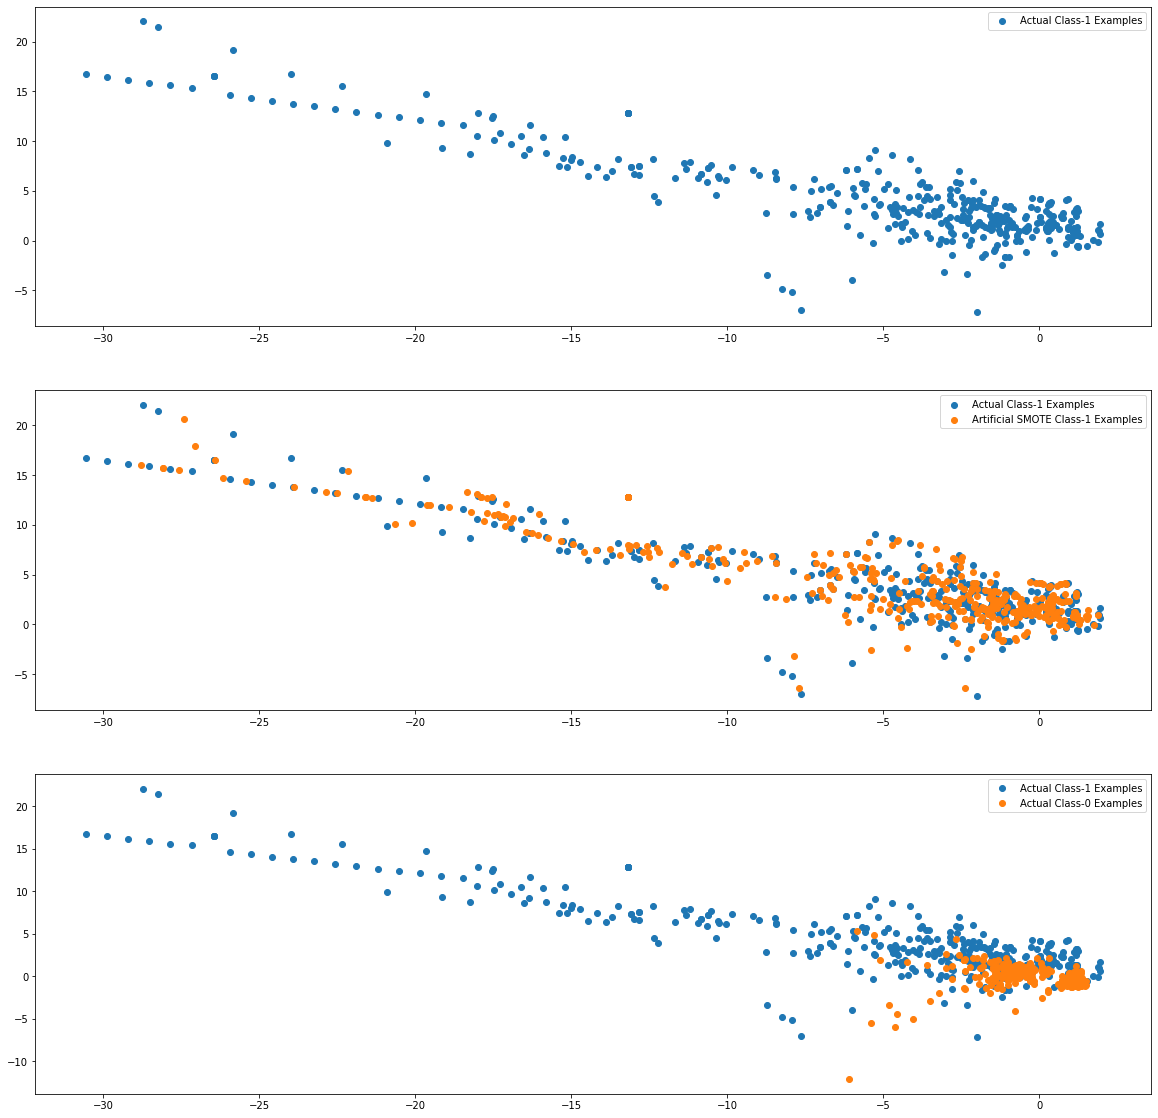

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from imblearn import over_sampling

sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do

X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
# plt.figure(figsize=[20, 20])
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0]].values[:X_train_1.shape[0],0], X_train_smote_1[:X_train_1.shape[0]].values[:X_train_1.shape[0],1], label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

plt.show()

### SMOTE

In [ ]:
import matplotlib
matplotlib.pyplot.rcdefaults()
from imblearn import over_sampling

#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE
skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote = SMOTE.fit_resample(X_train, y_train)
    
# Creating a separate dataframe for X_train_Smote
X_train_Smote = pd.DataFrame(data = X_train_Smote, columns=cols)

##### Build models on other algorithms to see the better performing on SMOTE

Logistic Regression with L1 and L2 Regularisation
Max AUC_ROC for 12: 0.9930148696028056
Max AUC_ROC for 11: 0.5
Accuracy of Logistic Regression model with l2 regularisation : 0.9835325924755535
Confusion Matrix


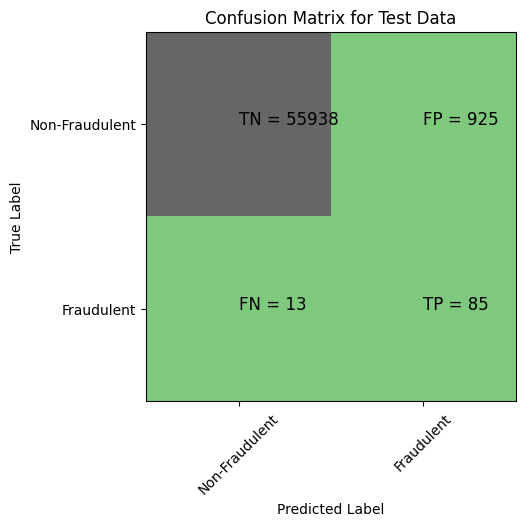

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.08      0.87      0.15        98

    accuracy                           0.98     56961
   macro avg       0.54      0.93      0.57     56961
weighted avg       1.00      0.98      0.99     56961

Accuracy of Logistic Regression model with l1 regularisation : 0.9982795245869981
Confusion Matrix


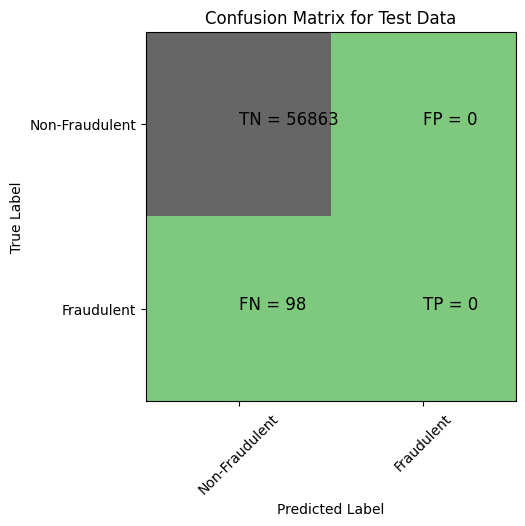

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9745831100672686
l2 threshold: 0.3939903200381019
ROC for the test dataset 97.5%


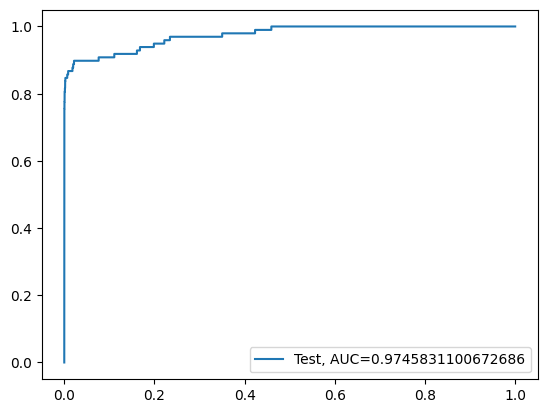

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


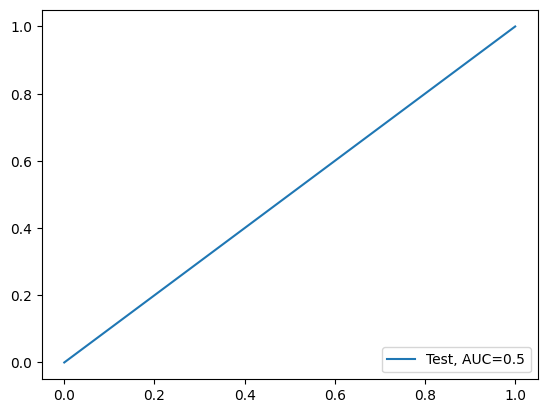

Time taken by the Model: --- 704.1670761108398 seconds ---
********************************************************************************
KNN Model
Model Score
0.9946805709169432
Confusion Matrix


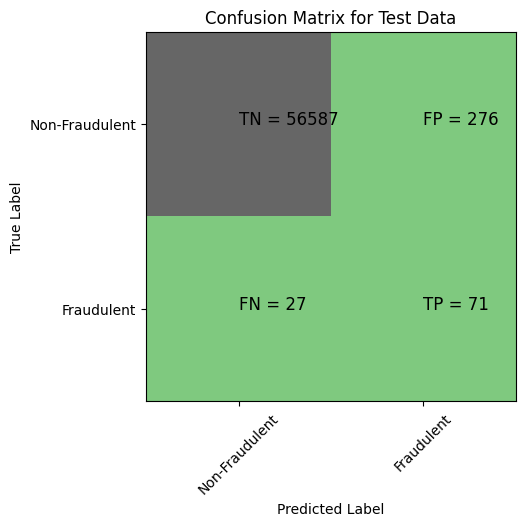

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.20      0.72      0.32        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.66     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value: 0.8602674455287628
KNN threshold: 0.6
ROC for the Test Dataset 86.0%


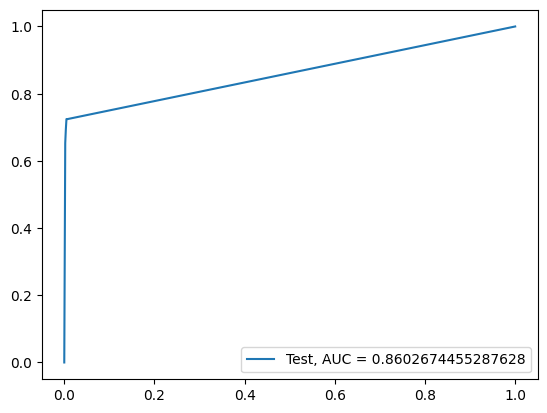

Time Taken by Model: --- 3706.053031682968 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
giniscore: 0.9977528484401608
Confusion Matrix


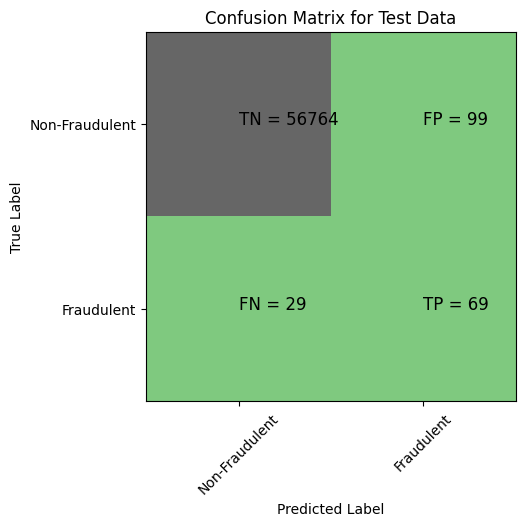

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.70      0.52        98

    accuracy                           1.00     56961
   macro avg       0.71      0.85      0.76     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value: 0.8511703029874526
Tree thresholds: 1.0
ROC for the Test Dataset 85.1%


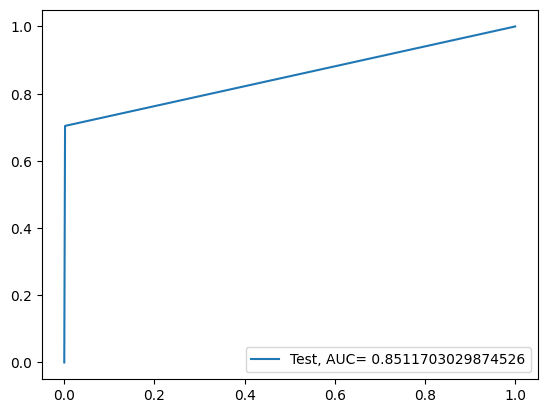

Time Taken by Model: --- 58.60907578468323 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix


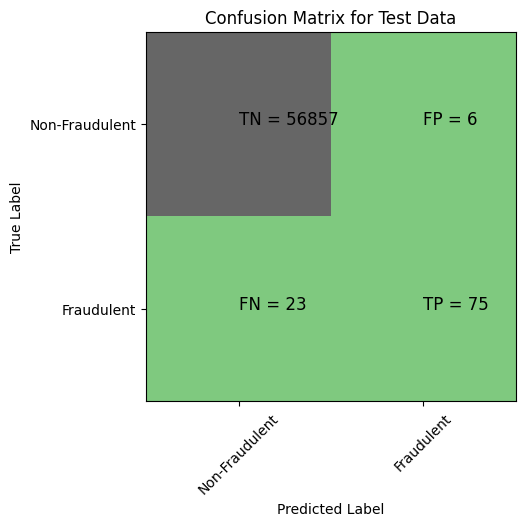

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.77      0.84        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9614705879186172
Random Forest threshold: 0.05
ROC for the Test Dataset 96.1%


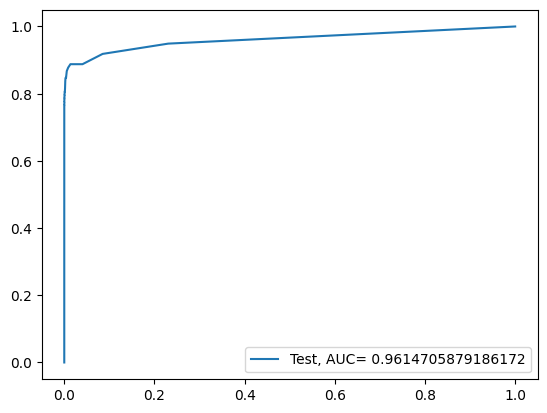

Time Taken by Model: --- 491.4839127063751 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9934165481645336
Confusion Matrix


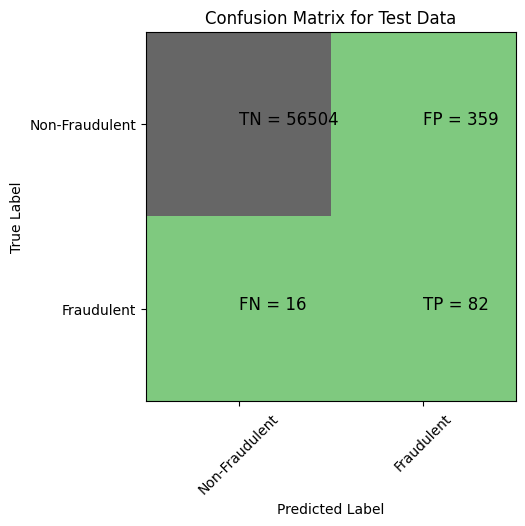

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.19      0.84      0.30        98

    accuracy                           0.99     56961
   macro avg       0.59      0.92      0.65     56961
weighted avg       1.00      0.99      1.00     56961

XGBoost roc_value: 0.9763188429619778
XGBoost threshold: 0.27664539217948914
ROC for the Test Dataset 97.6%


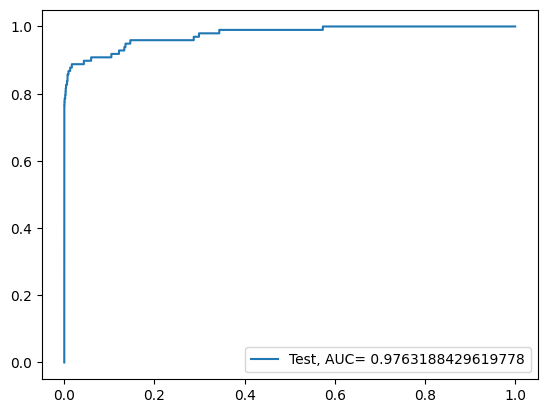

Time Taken by Model: --- 152.77767252922058 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE
#perform hyperparameter tuning
#print the evaluation result by choosing a evaluation metric
#print the optimum value of hyperparameters

# Running the SVM Model with Sigmoid Kernel
# print("SVM Model with Sigmoid Kernel")
# start_time = time.time()
# df_Results = SVM_Model(df_Results,"SMOTE Oversampling with StratifiedKFold CV", X_train_Smote, y_train_Smote, X_test, y_test)
# print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_Results = LogisticRegression_Models(df_Results,"SMOTE Oversampling with StratifiedKFold CV", X_train_Smote, y_train_Smote, X_test, y_test)
print("Time taken by the Model: --- %s seconds ---" % (time.time() - start_time))
print('*'*80)

# Running the KNN Model
print("KNN Model")
start_time = time.time()
df_Results = KNN_Models(df_Results,"SMOTE Oversampling with StratifiedKFold CV", X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running the Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = DecisionTree_Model(df_Results,"SMOTE Oversampling with StratifiedKFold CV", X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running the Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = RandomForest_Model(df_Results,"SMOTE Oversampling with StratifiedKFold CV", X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running the XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = XGBoost_Model(df_Results,"SMOTE Oversampling with StratifiedKFold CV", X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )



In [ ]:
df_Results

,Data_Imbalance_Handling,Model,Accuracy,ROC_Value,Threshold
0,Power Transformer,Logistic Regression with L2 regularisation,0.998999,0.966806,0.001289
1,Power Transformer,Logistic Regression with L1 regularisation,0.998841,0.963903,0.009276
2,RepeatedKFold Cross Validation,Logistic Regression with L2 regularisation,0.998982,0.990505,0.001428
3,RepeatedKFold Cross Validation,Logistic Regression with L1 regularisation,0.999034,0.917664,0.048157
4,StratifiedKFold Cross Validation,Logistic Regression with L2 regularisation,0.998771,0.983363,0.001559
5,StratifiedKFold Cross Validation,Logistic Regression with L1 regularisation,0.998754,0.889076,0.021087
6,Power Transformer,KNN,0.999298,0.900851,0.200000
7,Power Transformer,Tree Model with gini criteria,0.998806,0.859015,1.000000
8,Power Transformer,Random Forest,0.999350,0.940564,0.010000
9,Power Transformer,XGBoost,0.999315,0.975037,0.000756


### Print the class distribution after applying ADASYN

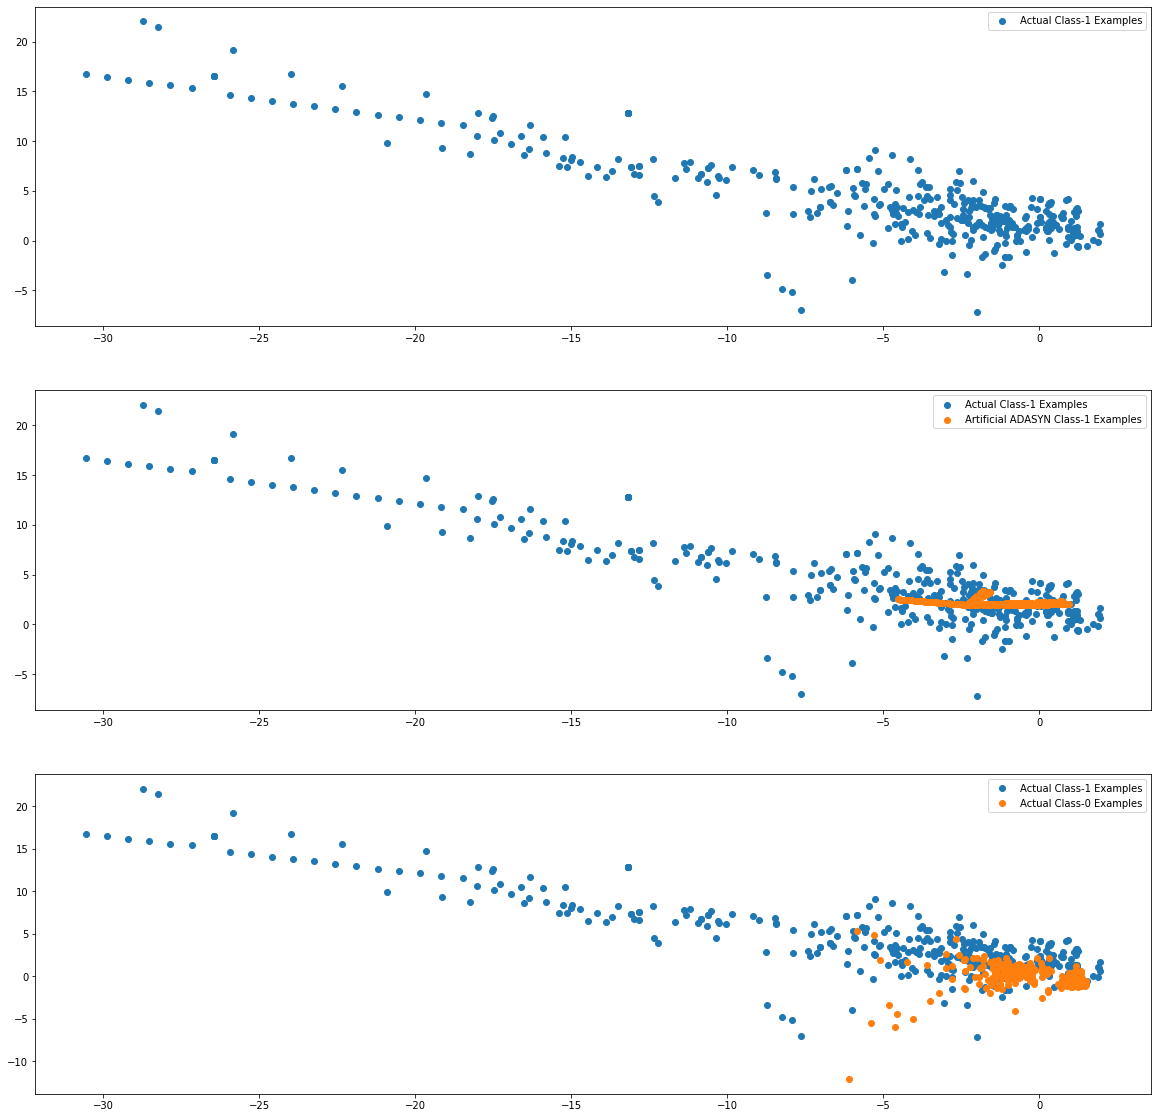

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0]].values[:X_train_1.shape[0],0], 
X_train_adasyn_1[:X_train_1.shape[0]].values[:X_train_1.shape[0],1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()


plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

plt.show()

In [ ]:
from imblearn import over_sampling

#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE
skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    ada = over_sampling.ADASYN(random_state=0)
    X_train_ADASYN, y_train_ADASYN = ada.fit_resample(X_train, y_train)
    
# Creating a separate dataframe for X_train_ADASYN
X_train_ADASYN = pd.DataFrame(data = X_train_ADASYN, columns=cols)

##### Build models on other algorithms to see the better performing on ADASYN

Logistic Regression with L1 and L2 Regularisation
Max AUC_ROC for 12: 0.9835138199509309
Max AUC_ROC for 11: 0.5
Accuracy of Logistic Regression model with l2 regularisation : 0.9579712434823827
Confusion Matrix


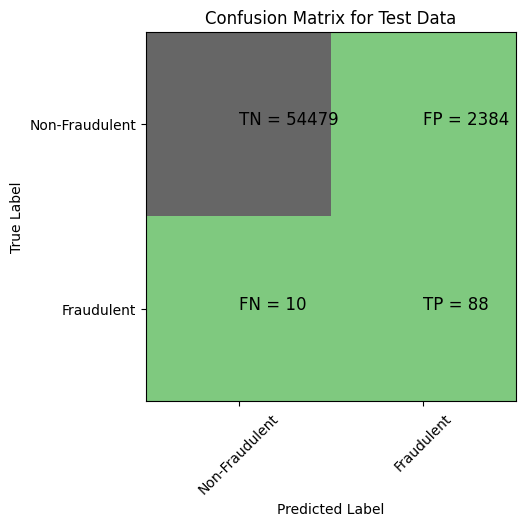

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56863
           1       0.04      0.90      0.07        98

    accuracy                           0.96     56961
   macro avg       0.52      0.93      0.52     56961
weighted avg       1.00      0.96      0.98     56961

Accuracy of Logistic Regression model with l1 regularisation : 0.9982795245869981
Confusion Matrix


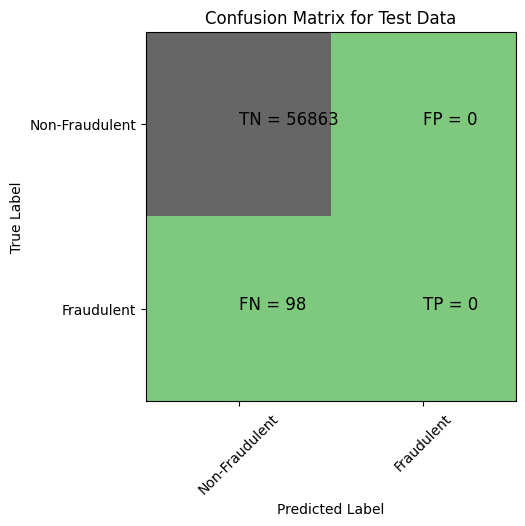

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9740293264835963
l2 threshold: 0.6115830551585083
ROC for the test dataset 97.4%


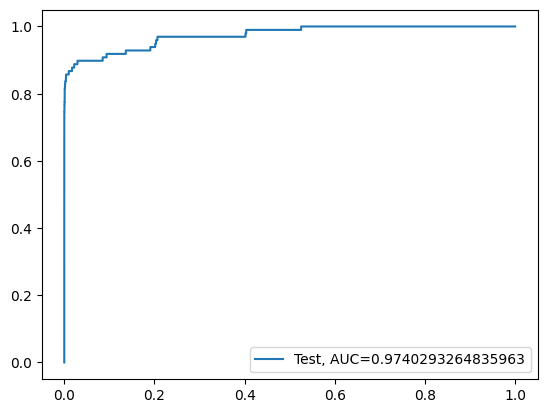

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


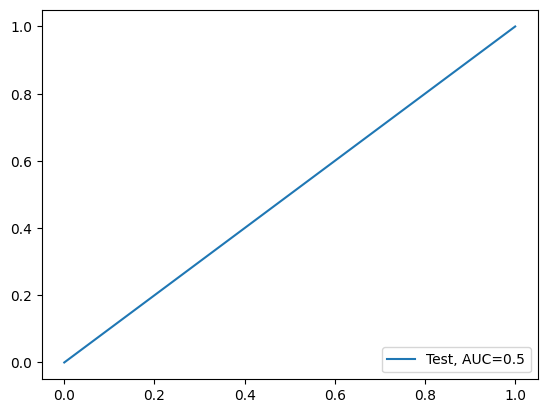

Time taken by the Model: --- 811.409866809845 seconds ---
********************************************************************************
KNN Model
Model Score
0.9945050122013307
Confusion Matrix


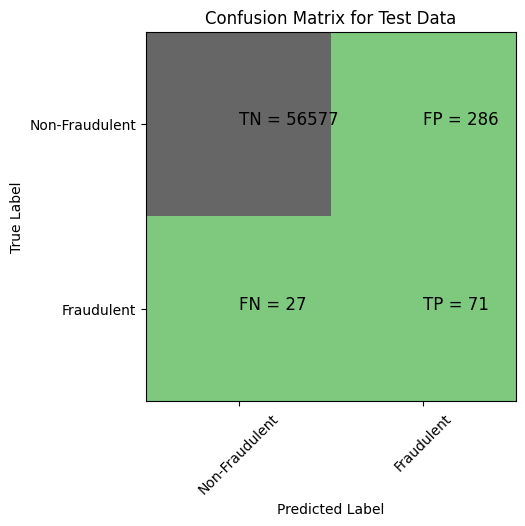

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.20      0.72      0.31        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.65     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value: 0.8601937811862167
KNN threshold: 0.6
ROC for the Test Dataset 86.0%


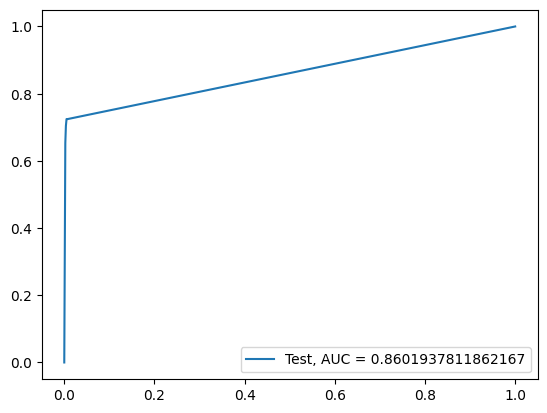

Time Taken by Model: --- 3465.2942445278168 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
giniscore: 0.9979459630273345
Confusion Matrix


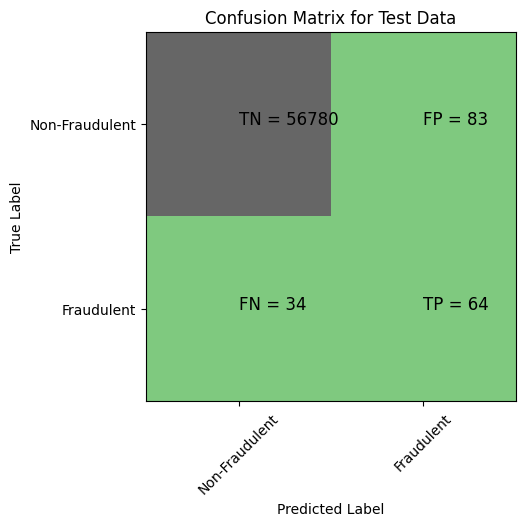

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.44      0.65      0.52        98

    accuracy                           1.00     56961
   macro avg       0.72      0.83      0.76     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value: 0.8258007879303172
Tree thresholds: 1.0
ROC for the Test Dataset 82.6%


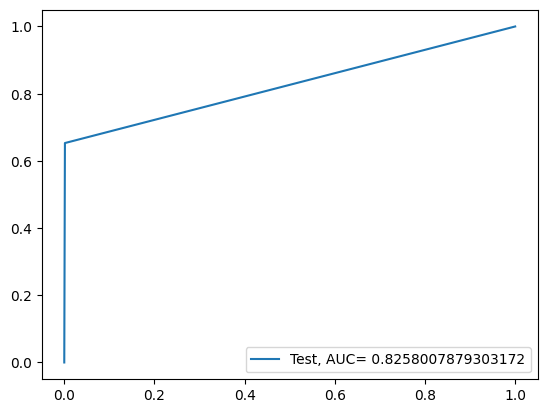

Time Taken by Model: --- 57.25547504425049 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995259914678464
Confusion Matrix


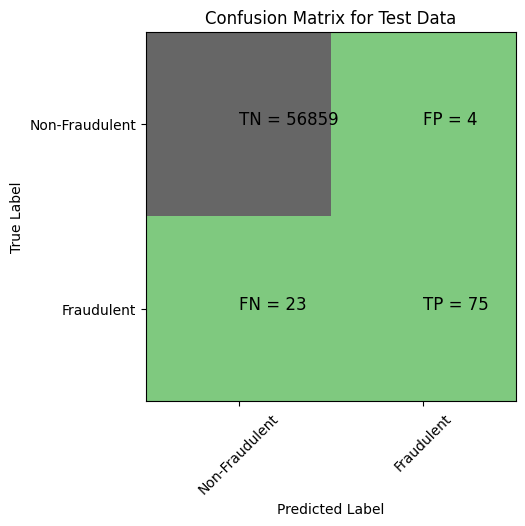

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.95      0.77      0.85        98

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9632269575962563
Random Forest threshold: 0.03
ROC for the Test Dataset 96.3%


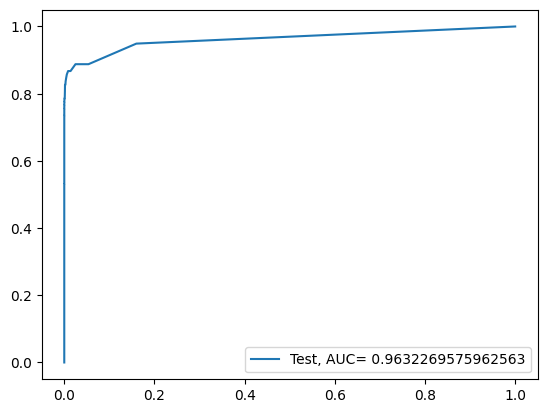

Time Taken by Model: --- 475.13804388046265 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9858675233931988
Confusion Matrix


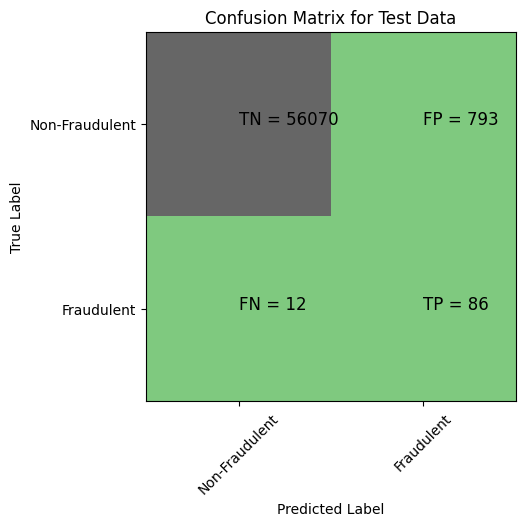

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.10      0.88      0.18        98

    accuracy                           0.99     56961
   macro avg       0.55      0.93      0.58     56961
weighted avg       1.00      0.99      0.99     56961

XGBoost roc_value: 0.9783021275267049
XGBoost threshold: 0.5225471258163452
ROC for the Test Dataset 97.8%


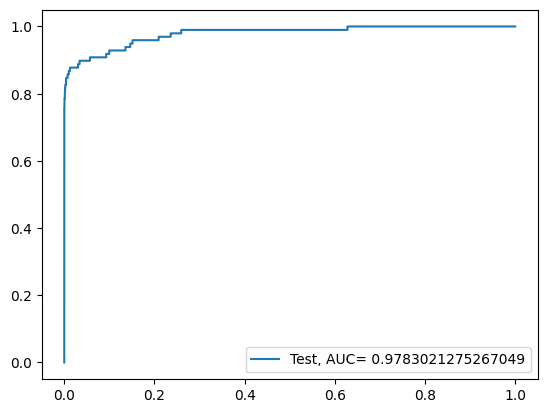

Time Taken by Model: --- 147.75972604751587 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters
import matplotlib
matplotlib.pyplot.rcdefaults()

# Running the SVM Model with Sigmoid Kernel
# print("SVM Model with Sigmoid Kernel")
# start_time = time.time()
# df_Results = SVM_Model(df_Results,"ADASYN Oversampling with StratifiedKFold CV", X_train_ADASYN, y_train_ADASYN, X_test, y_test)
# print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

# Running the Logistic Regression model 
print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_Results = LogisticRegression_Models(df_Results,"ADASYN Oversampling with StratifiedKFold CV", X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time taken by the Model: --- %s seconds ---" % (time.time() - start_time))
print('*'*80)

# Running the KNN Model
print("KNN Model")
start_time = time.time()
df_Results = KNN_Models(df_Results,"ADASYN Oversampling with StratifiedKFold CV", X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running the Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = DecisionTree_Model(df_Results,"ADASYN Oversampling with StratifiedKFold CV", X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running the Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = RandomForest_Model(df_Results,"ADASYN Oversampling with StratifiedKFold CV", X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running the XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = XGBoost_Model(df_Results,"ADASYN Oversampling with StratifiedKFold CV", X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


# Model Evaluation

In [ ]:
df_Results.sort_values(by=['ROC_Value'], ascending=False)

,Data_Imbalance_Handling,Model,Accuracy,ROC_Value,Threshold
2,RepeatedKFold Cross Validation,Logistic Regression with L2 regularisation,0.998982,0.990505,0.001428
14,RepeatedKFold Cross Validation,XGBoost,0.999614,0.984514,0.001816
4,StratifiedKFold Cross Validation,Logistic Regression with L2 regularisation,0.998771,0.983363,0.001559
26,Random Oversampling with StratifiedKFold CV,XGBoost,0.996313,0.983338,0.184181
21,Random Oversampling with StratifiedKFold CV,Logistic Regression with L2 regularisation,0.986412,0.980769,0.332717
38,ADASYN Oversampling with StratifiedKFold CV,XGBoost,0.985868,0.978302,0.522547
19,StratifiedKFold Cross Validation,XGBoost,0.999386,0.978148,0.002443
32,SMOTE Oversampling with StratifiedKFold CV,XGBoost,0.993417,0.976319,0.276645
9,Power Transformer,XGBoost,0.999315,0.975037,0.000756
27,SMOTE Oversampling with StratifiedKFold CV,Logistic Regression with L2 regularisation,0.983533,0.974583,0.393990


### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

From the above information it is evident that XGBoost model with RandomOverSampling and StratifiedKFold Cross Validation give the best results so far.

In [ ]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9963132669721388
XGboost roc_value: 0.9833383100879415
XGBoost threshold: 0.1841813176870346


In [ ]:
# Tuning for max_depth and min_child_weight
from xgboost.sklearn import XGBClassifier

from sklearn.model_selection import GridSearchCV

param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
              param_grid = param_test, scoring='roc_auc', n_jobs=4, cv=5)

gsearch1.fit(X_over.values, y_over.values)

gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([243.692696  , 243.04494972, 243.49412994, 403.65252485,
         409.85021696, 416.51155548, 571.36409812, 557.76764164,
         548.29530525, 677.39601197, 662.3845964 , 569.53970547]),
  'std_fit_time': array([ 1.13533752,  0.37334448,  1.35442355,  3.71160563,  3.36167551,
          3.98479716,  5.29098309,  4.45156024,  5.8004096 ,  6.28554536,
          8.30806651, 75.7856839 ]),
  'mean_score_time': array([0.70649514, 0.71798759, 0.66247416, 1.15897741, 1.26600628,
         1.28526578, 1.19605465, 1.51454678, 1.19160223, 1.48284917,
         1.41500096, 0.88101859]),
  'std_score_time': array([0.04103445, 0.0519989 , 0.05714265, 0.27069717, 0.36772094,
         0.38127315, 0.08288564, 0.32371455, 0.08800415, 0.3549047 ,
         0.17936139, 0.36845303]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False]

In [ ]:
# Tuning XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
'n_estimators':range(60,150,20)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bynode=1, colsample_bytree=1, gamma=0,
                    learning_rate=0.1, max_delta_step=0, max_depth=3,
                    min_child_weight=5, n_estimators=100,
                    nthread=None, objective='binary:logistic', random_state=42,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=None, subsample=1, verbosity=1), error_score="raise",
        param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)

gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([151.82182708, 204.97666216, 253.66790862, 311.26776013,
         295.67146597]),
  'std_fit_time': array([ 1.30788069,  8.3857143 ,  9.51719082, 16.46631516, 81.41773156]),
  'mean_score_time': array([0.54135466, 0.64932847, 0.75107098, 1.11475086, 0.79085264]),
  'std_score_time': array([0.0921148 , 0.03957863, 0.0466248 , 0.26232835, 0.32033663]),
  'param_n_estimators': masked_array(data=[60, 80, 100, 120, 140],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 60},
   {'n_estimators': 80},
   {'n_estimators': 100},
   {'n_estimators': 120},
   {'n_estimators': 140}],
  'split0_test_score': array([0.99792013, 0.99888754, 0.99923259, 0.99938331, 0.99941094]),
  'split1_test_score': array([0.99932553, 0.99967506, 0.99984854, 0.9999076 , 0.99994512]),
  'split2_test_score': array([0.99320278, 0.9954002 , 0.9981156 , 0.998684  , 0.99903671]),
  'split3_test_score': array(

In [ ]:
# With 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 130(due to computaztional restrictions) parameters tuned above we will now tune the learning rate
# Lets tune XGBoost Model for learning_rate

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'learning_rate':[0.05,0.1,0.125,0.15,0.2]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=4, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([424.26002274, 447.42662263, 440.99756598, 427.52134428,
         361.74788966]),
  'std_fit_time': array([  3.78180872,  21.79753238,  11.65045247,  13.71680827,
         103.84764381]),
  'mean_score_time': array([1.10577888, 1.33012505, 1.20384049, 1.46511307, 1.19307928]),
  'std_score_time': array([0.049485  , 0.33011713, 0.10907089, 0.32657083, 0.58204822]),
  'param_learning_rate': masked_array(data=[0.05, 0.1, 0.125, 0.15, 0.2],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'learning_rate': 0.05},
   {'learning_rate': 0.1},
   {'learning_rate': 0.125},
   {'learning_rate': 0.15},
   {'learning_rate': 0.2}],
  'split0_test_score': array([0.99916506, 0.99945946, 0.99950728, 0.9996004 , 0.99963387]),
  'split1_test_score': array([0.99991186, 0.99999373, 0.9999964 , 0.99999972, 1.        ]),
  'split2_test_score': array([0.97953612, 0.99486767, 0.99737563, 0.99697181, 0.99969339]

In [ ]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9993855444953564
XGboost roc_value: 0.9832620437162432
XGBoost threshold: 0.0008988343179225922


In [ ]:
#With 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 130 , gamma: 0.1 parameters tuned above we will now check learning rate

# We will narror down the tunned parameters of max_depth ,  min_child_weight and n_estimators
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'subsample':[i/10.0 for i in range(7,10)],
 'colsample_bytree':[i/10.0 for i in range(7,10)]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([310.70536323, 307.21005273, 317.42349   , 353.22390609,
         345.24793849, 366.24115934, 389.17839284, 398.68021569,
         341.59934373]),
  'std_fit_time': array([13.73556935,  6.71196526, 12.17795695, 19.07915024,  9.90526468,
         17.53867749, 18.61314422, 20.1965893 , 89.75554862]),
  'mean_score_time': array([1.32040377, 1.38853273, 1.19181495, 1.27970757, 1.37698817,
         1.31093068, 1.50630283, 1.21424265, 0.84368134]),
  'std_score_time': array([0.34977744, 0.26032056, 0.1097223 , 0.22242007, 0.30670066,
         0.29170187, 0.36149028, 0.08533744, 0.32984211]),
  'param_colsample_bytree': masked_array(data=[0.7, 0.7, 0.7, 0.8, 0.8, 0.8, 0.9, 0.9, 0.9],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.7, 0.8, 0.9, 0.7, 0.8, 0.9, 0.7, 0.8, 0.9],
               mask=[False, False, False, F

The ROC_Value has dropped in the above model so we will not use this combination

In [ ]:
# perform the best oversampling method on X_train & y_train

#initialise the model with optimum hyperparameters
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)  

# fit on the balanced dataset
clf.fit(X_over, y_over) 

#print the evaluation score on the X_test by choosing the best evaluation metric
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9993855444953564
XGboost roc_value: 0.9832620437162432
XGBoost threshold: 0.0008988343179225922


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 10
3rd Top var = 12


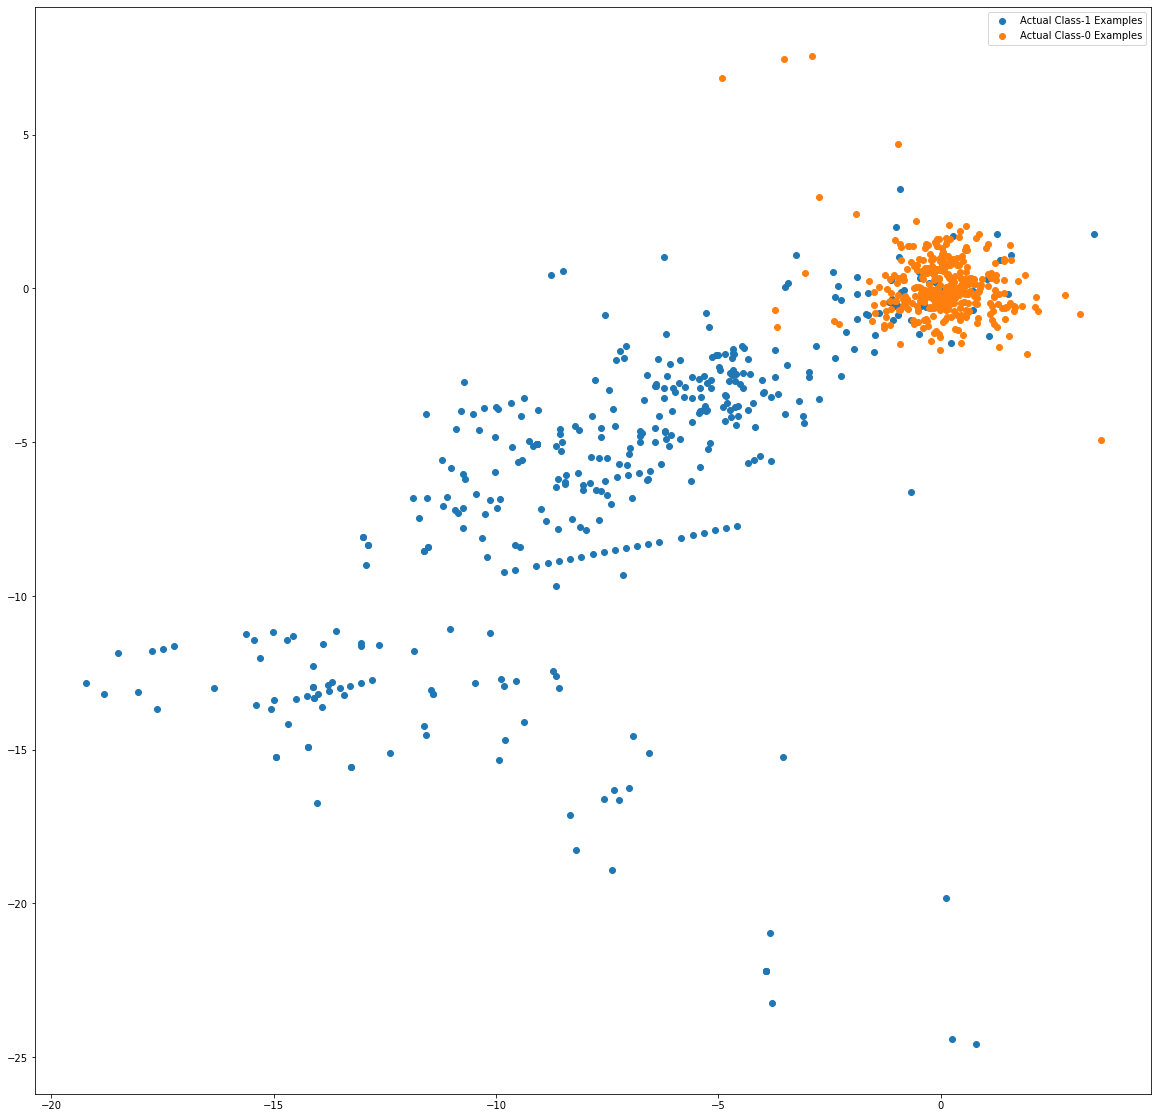

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGboost roc_value: 0.9832620437162432
XGBoost threshold: 0.0008988343179225922


# So We come to a conclusion that XGBoost Model with RandomOverSampling and Stratified kFold Validations which provide the Top result after doing the parameter tuning.

So Final Metrics of the model are shown below

1. Model Accuracy: 0.9993855444953564
2. XGboost roc_value: 0.9832620437162432
3. XGBoost threshold: 0.0008988343179225922

Note: We can also consider logistic regression model with L2 Regularisation with Repeated KFold cross validations which provide the best results without any oversampling on the imbalanced dataset.